# Import delle librerie

In [23]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tslearn.clustering import silhouette_score
import matplotlib as mpl

# carichiamo i risultati del k-means più serie temporali

In [24]:
with open('./pickles/kmeans_total_3.pickle', 'rb') as handle:
    kmeans_total3 = pickle.load(handle)

with open('./pickles/kmeans_total_4.pickle', 'rb') as handle:
    kmeans_total4 = pickle.load(handle)

with open('./pickles/kmeans_total_6.pickle', 'rb') as handle:
    kmeans_total6 = pickle.load(handle)

with open('./pickles/newSeries_total_3.pickle', 'rb') as handle:
    newSeries_total3 = pickle.load(handle)

with open('./pickles/newSeries_total_4.pickle', 'rb') as handle:
    newSeries_total4 = pickle.load(handle)

with open('./pickles/newSeries_total_6.pickle', 'rb') as handle:
    newSeries_total6 = pickle.load(handle)

with open('./pickles/rese_total_3.pickle', 'rb') as handle:
    rese_total_3 = pickle.load(handle)

with open('./pickles/rese_total_4.pickle', 'rb') as handle:
    rese_total_4 = pickle.load(handle)

with open('./pickles/rese_total_6.pickle', 'rb') as handle:
    rese_total_6 = pickle.load(handle)

with open('./pickles/newResa3.pickle', 'rb') as handle:
    newResa3 = pickle.load(handle)

with open('./pickles/newResa4.pickle', 'rb') as handle:
    newResa4 = pickle.load(handle)

with open('./pickles/newResa6.pickle', 'rb') as handle:
    newResa6 = pickle.load(handle)

In [25]:
# Numero di cluster 

num_cluster = 2

# Rese pulite

newResa3 = newResa3[(newResa3<=11000) & (newResa3 >= 4000)]

newResa4 = newResa4[(newResa4<=11000) & (newResa4 >= 4000)]

newResa6 = newResa6[(newResa6<=11000) & (newResa6 >= 4000)]

# Andiamo a fare il plot della silhoutte

In [26]:
silhoutte_3 = []
silhoutte_4 = []
silhoutte_6 = []

for x in range(0,int(155/5)):
    silhoutte_3.append([])
    silhoutte_4.append([])
    silhoutte_6.append([])
    for y in range(0,int(155/5)):
        if(newSeries_total3[x,y] is not None):
            silhoutte_3[-1].append(silhouette_score(newSeries_total3[x,y],kmeans_total3[x,y],metric="euclidean"))
        else:
            continue
        if(newSeries_total4[x,y] is not None):
            silhoutte_4[-1].append(silhouette_score(newSeries_total4[x,y],kmeans_total4[x,y],metric="euclidean"))
        else:
            continue    
        if(newSeries_total6[x,y] is not None):
            silhoutte_6[-1].append(silhouette_score(newSeries_total6[x,y],kmeans_total6[x,y],metric="euclidean"))
        else:
            continue

In [27]:
# Abbiamo una matrice triangolare incompleta, dobbiamo riempirla.

matrice_silhoutte3 = np.zeros([int(155/5),int(155/5)])
matrice_silhoutte4 = np.zeros([int(155/5),int(155/5)])
matrice_silhoutte6 = np.zeros([int(155/5),int(155/5)])

for a,x in zip(silhoutte_3,range(0,int(150/5))):
    for c,y in zip(a,range(0,len(a))):
        matrice_silhoutte3[x,y] = c

for a,x in zip(silhoutte_4,range(0,int(150/5))):
    for c,y in zip(a,range(0,len(a))):
        matrice_silhoutte4[x,y] = c

for a,x in zip(silhoutte_6,range(0,int(150/5))):
    for c,y in zip(a,range(0,len(a))):
        matrice_silhoutte6[x,y] = c

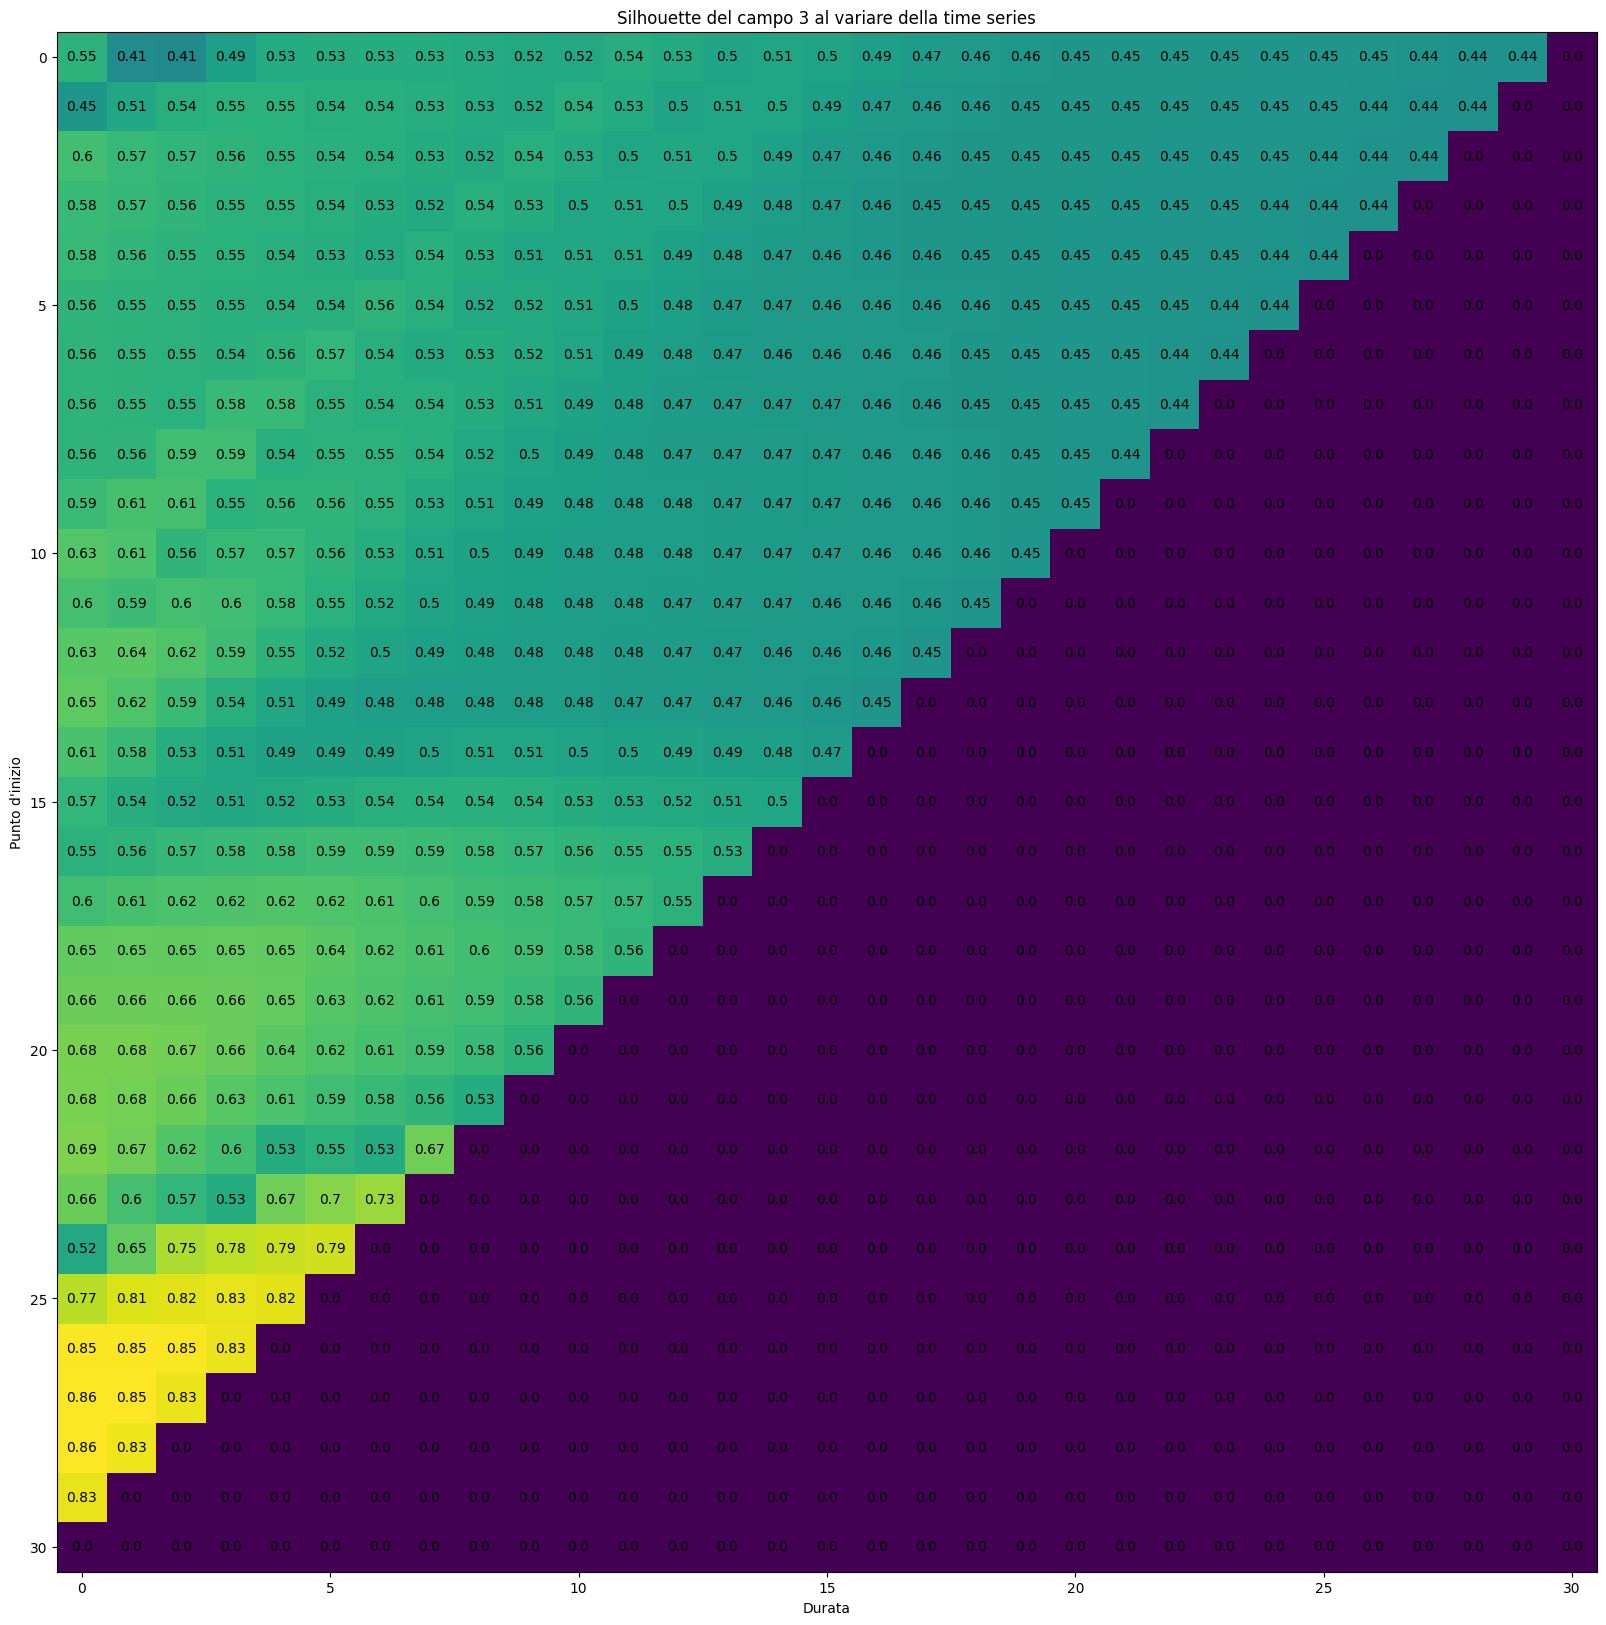

In [28]:

fig, ax = plt.subplots()

image = ax.imshow(matrice_silhoutte3)

plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")
plt.title("Silhouette del campo 3 al variare della time series")

fig.set_size_inches(20,20)

for i in range(0,matrice_silhoutte3.shape[0]):
    for j in range(0,matrice_silhoutte3.shape[1]):
        c = np.round(matrice_silhoutte3[i,j],decimals=2)
        ax.text(j, i, str(c), va='center', ha='center')

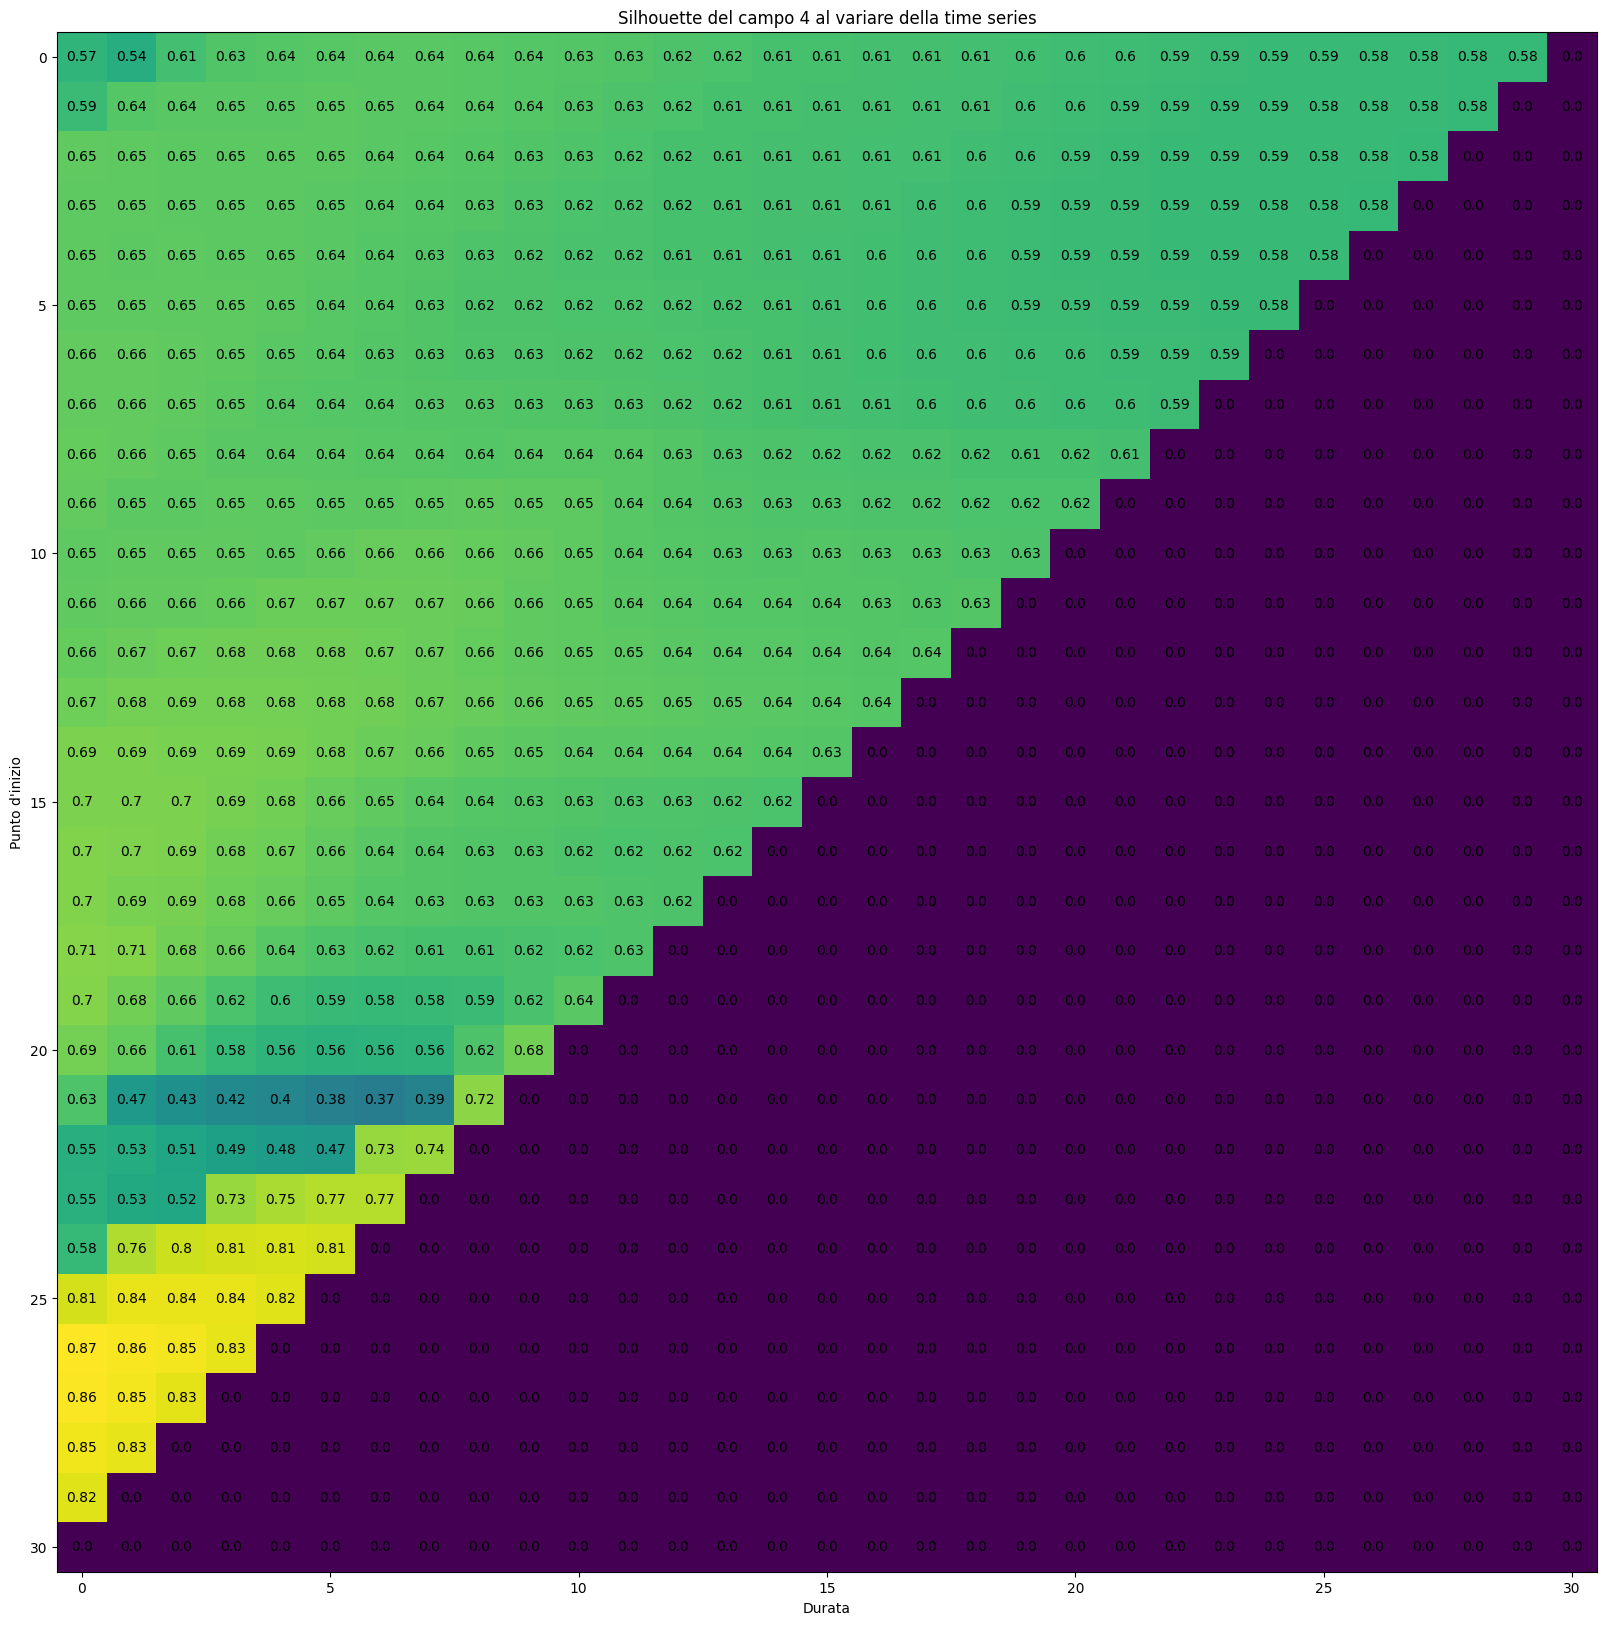

In [29]:

fig, ax = plt.subplots()

image = ax.imshow(matrice_silhoutte4)

plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")
plt.title("Silhouette del campo 4 al variare della time series")

fig.set_size_inches(20,20)

for i in range(0,matrice_silhoutte4.shape[0]):
    for j in range(0,matrice_silhoutte4.shape[1]):
        c = np.round(matrice_silhoutte4[i,j],decimals=2)
        ax.text(j, i, str(c), va='center', ha='center')

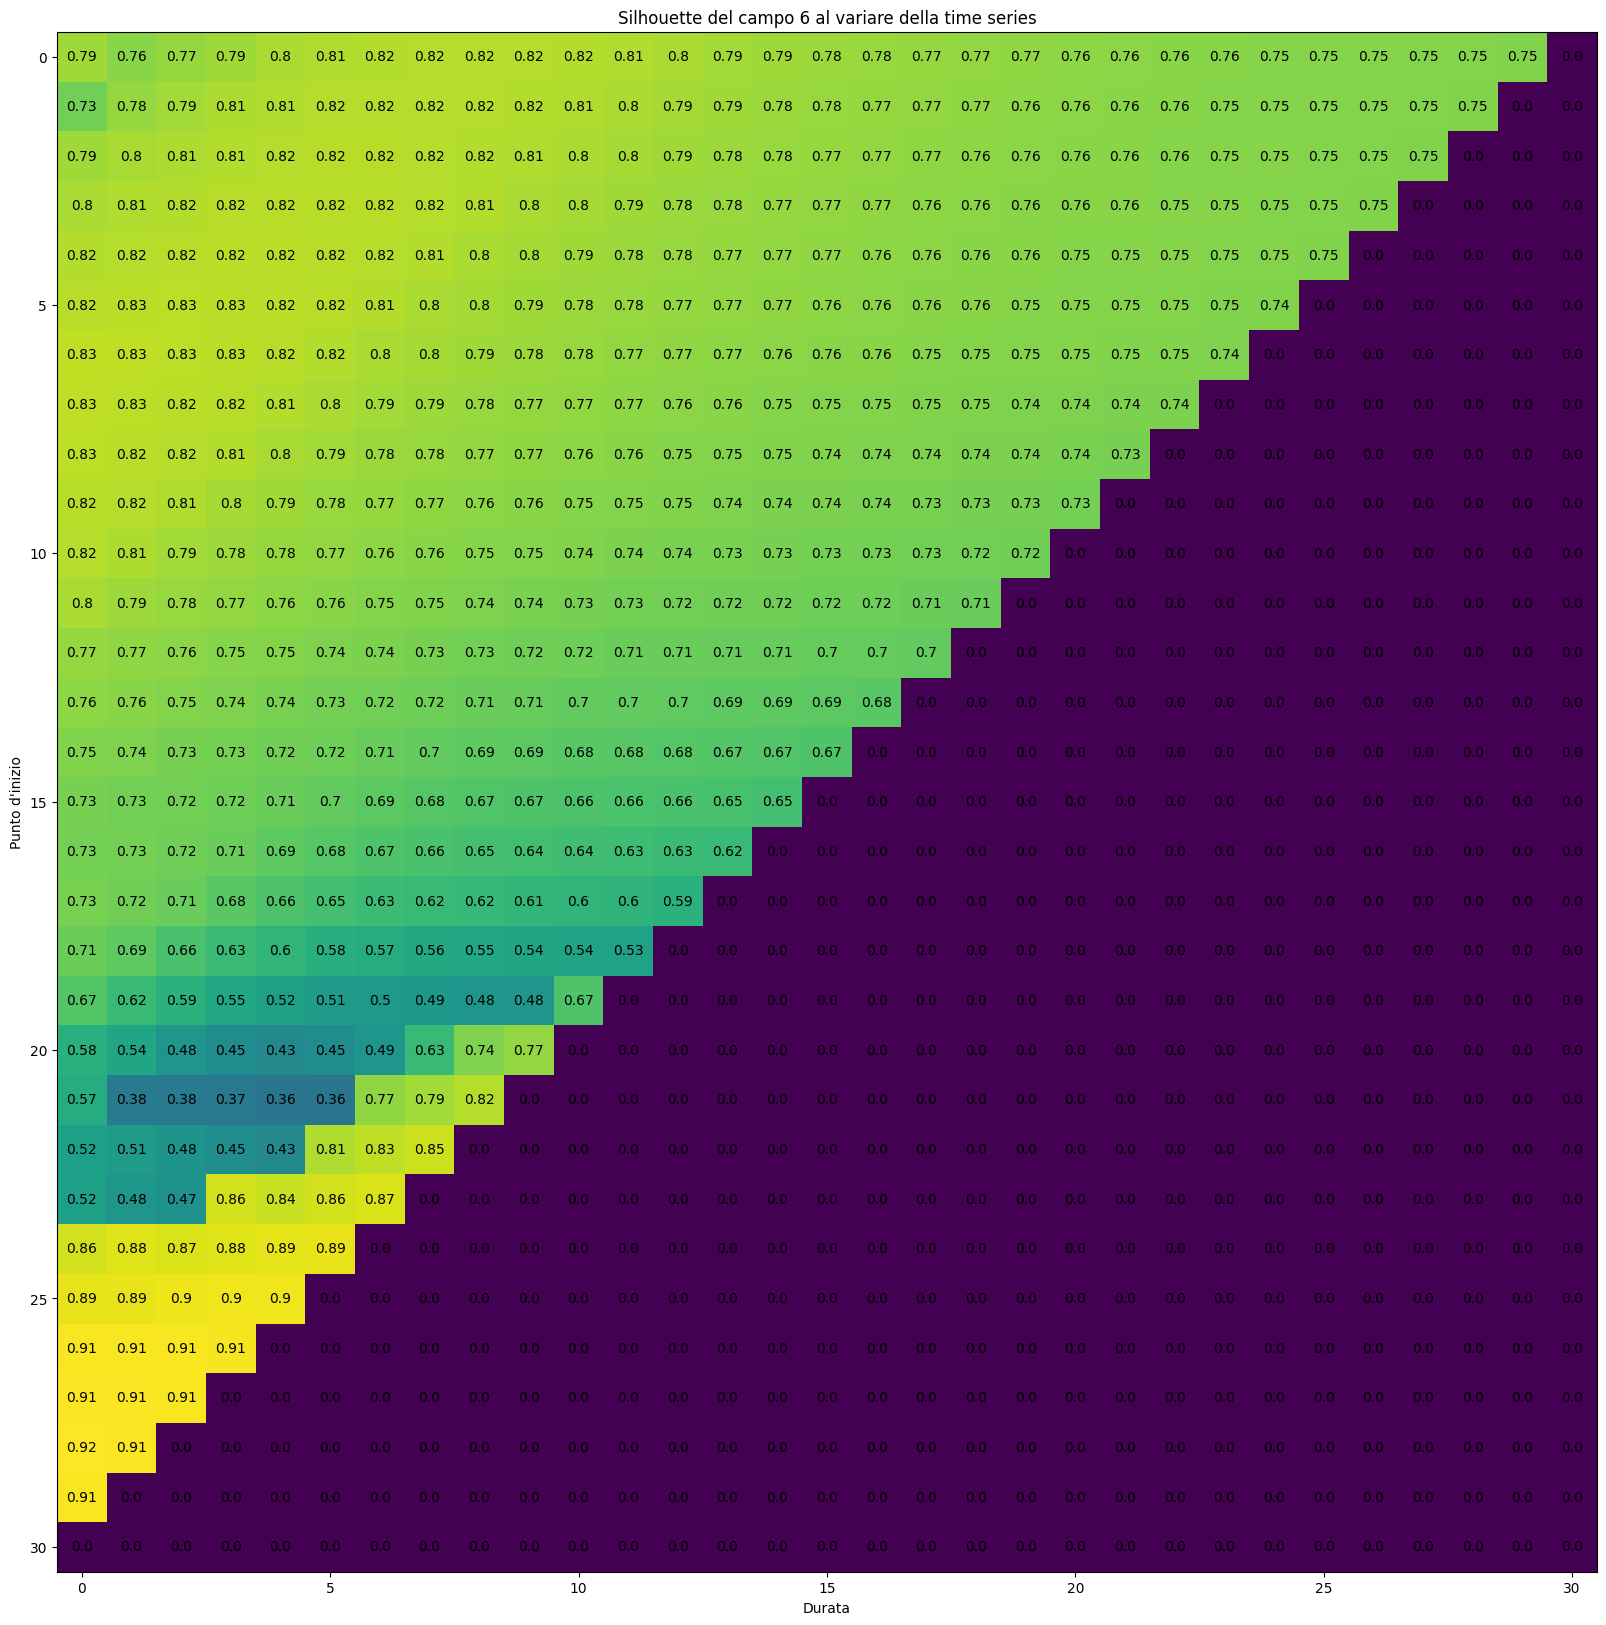

In [30]:

fig, ax = plt.subplots()

image = ax.imshow(matrice_silhoutte6)

plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")
plt.title("Silhouette del campo 6 al variare della time series")

fig.set_size_inches(20,20)

for i in range(0,matrice_silhoutte6.shape[0]):
    for j in range(0,matrice_silhoutte6.shape[1]):
        c = np.round(matrice_silhoutte6[i,j],decimals=2)
        ax.text(j, i, str(c), va='center', ha='center')

# Metriche di coesione, deviazione standard

In [31]:
x = int(155/5)
y = int(155/5)

In [32]:
meanStd3 = np.zeros([x,y,num_cluster])
meanStd4 = np.zeros([x,y,num_cluster])
meanStd6 = np.zeros([x,y,num_cluster])
cluster_deviation3 = np.zeros([x,y,num_cluster])
cluster_deviation4 = np.zeros([x,y,num_cluster])
cluster_deviation6 = np.zeros([x,y,num_cluster])
number_elements_3 = np.zeros([x,y,num_cluster],dtype='uint32')
number_elements_4 = np.zeros([x,y,num_cluster],dtype='uint32')
number_elements_6 = np.zeros([x,y,num_cluster],dtype='uint32')

for i in range(x):
    for j in range(y):
        if rese_total_3[i,j,0] is not None:
            for k in range(num_cluster):
                mean3 = np.mean(rese_total_3[i,j,k])
                sum3 = 0
                for resa in rese_total_3[i,j,k]:
                    sum3 += (resa-mean3)**2
                number_elements_3[i,j,k] = len(rese_total_3[i,j,k])
                if number_elements_3[i,j,k] > 1:
                    cluster_deviation3[i,j,k] = np.sqrt(sum3/(number_elements_3[i,j,k]-1))
                else:
                    cluster_deviation3[i,j,k] = 1
                    
            meanStd3[i,j] = cluster_deviation3[i,j].mean()

        if rese_total_4[i,j,0] is not None:
            for k in range(num_cluster):
                mean4 = np.mean(rese_total_4[i,j,k])
                sum4 = 0
                for resa in rese_total_4[i,j,k]:
                    sum4 += (resa-mean4)**2
                number_elements_4[i,j,k] = len(rese_total_4[i,j,k])
                if number_elements_4[i,j,k] > 1:
                    cluster_deviation4[i,j,k] = np.sqrt(sum4/(number_elements_4[i,j,k]-1))
                else:
                    cluster_deviation4[i,j,k] = 1
                    
            meanStd4[i,j] = cluster_deviation4[i,j].mean()

        if rese_total_6[i,j,0] is not None:
            for k in range(num_cluster):
                mean6 = np.mean(rese_total_6[i,j,k])
                sum6 = 0
                for resa in rese_total_6[i,j,k]:
                    sum6 += (resa-mean6)**2
                number_elements_6[i,j,k] = len(rese_total_6[i,j,k])
                if number_elements_6[i,j,k] > 1:
                    cluster_deviation6[i,j,k] = np.sqrt(sum6/(number_elements_6[i,j,k]-1))
                else:
                    cluster_deviation6[i,j,k] = 1
                    
            meanStd4[i,j] = cluster_deviation6[i,j].mean()

        

# Stampiamo le matrici per le metriche di coesione 

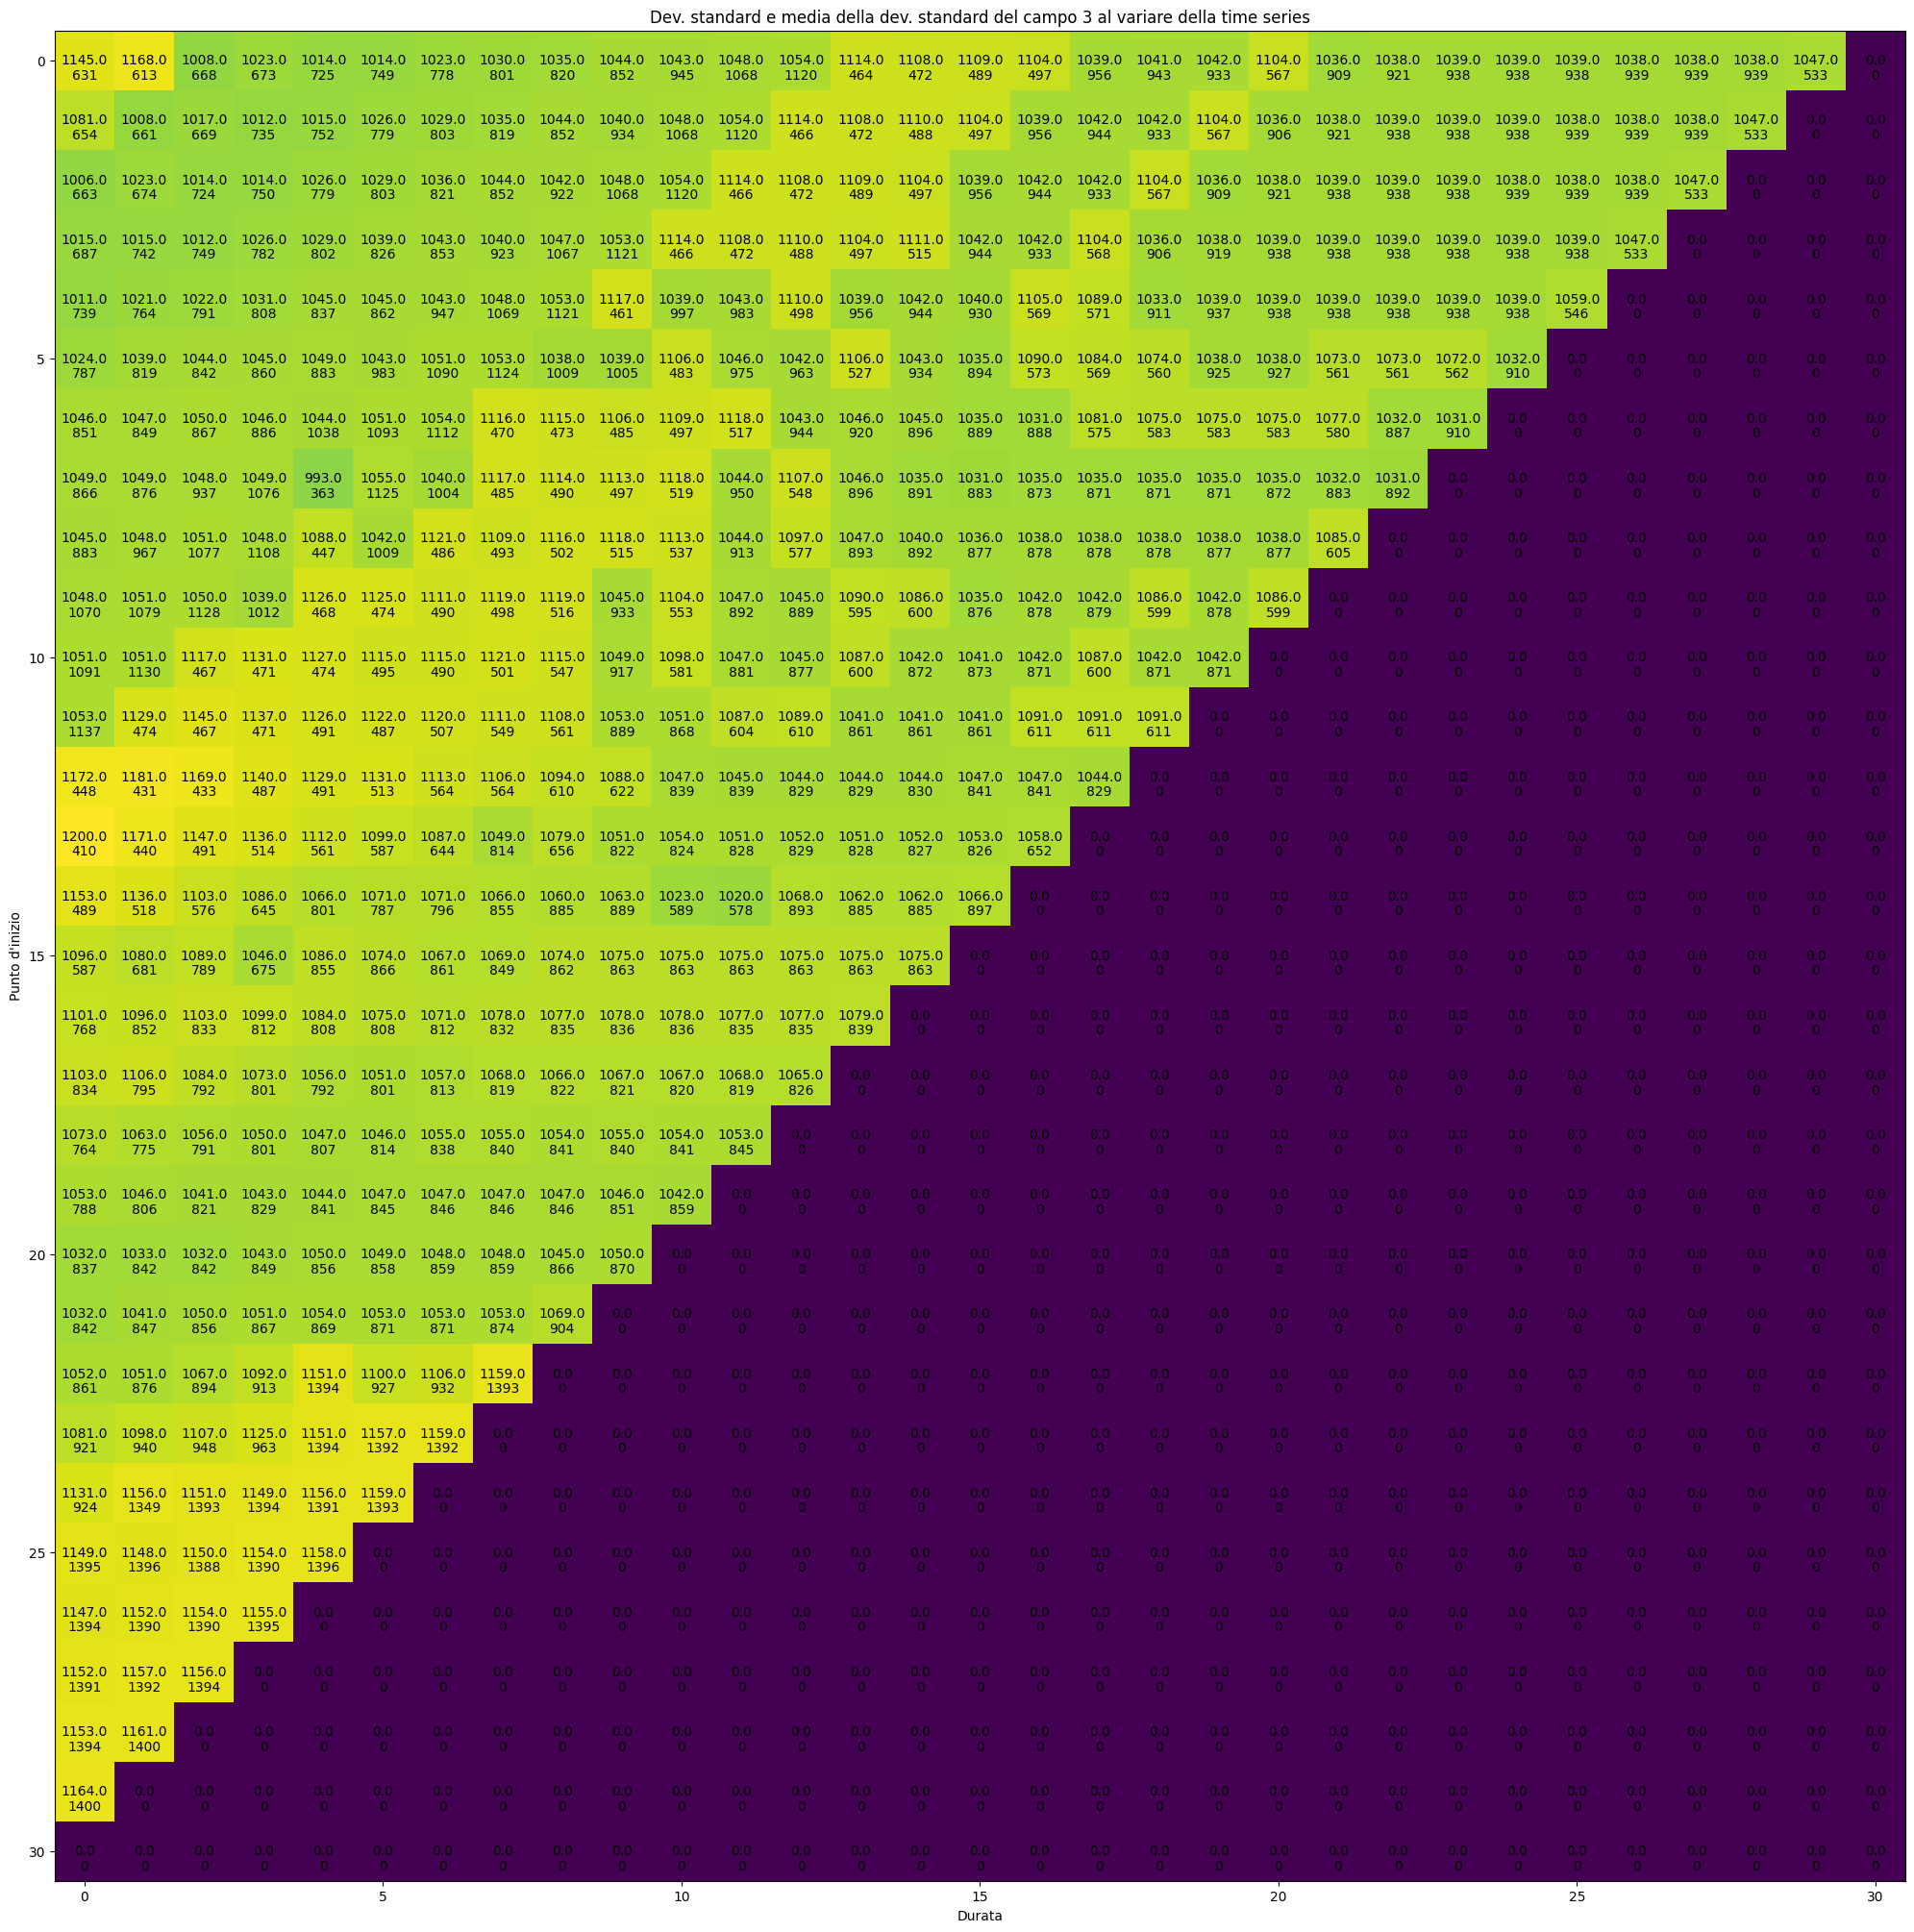

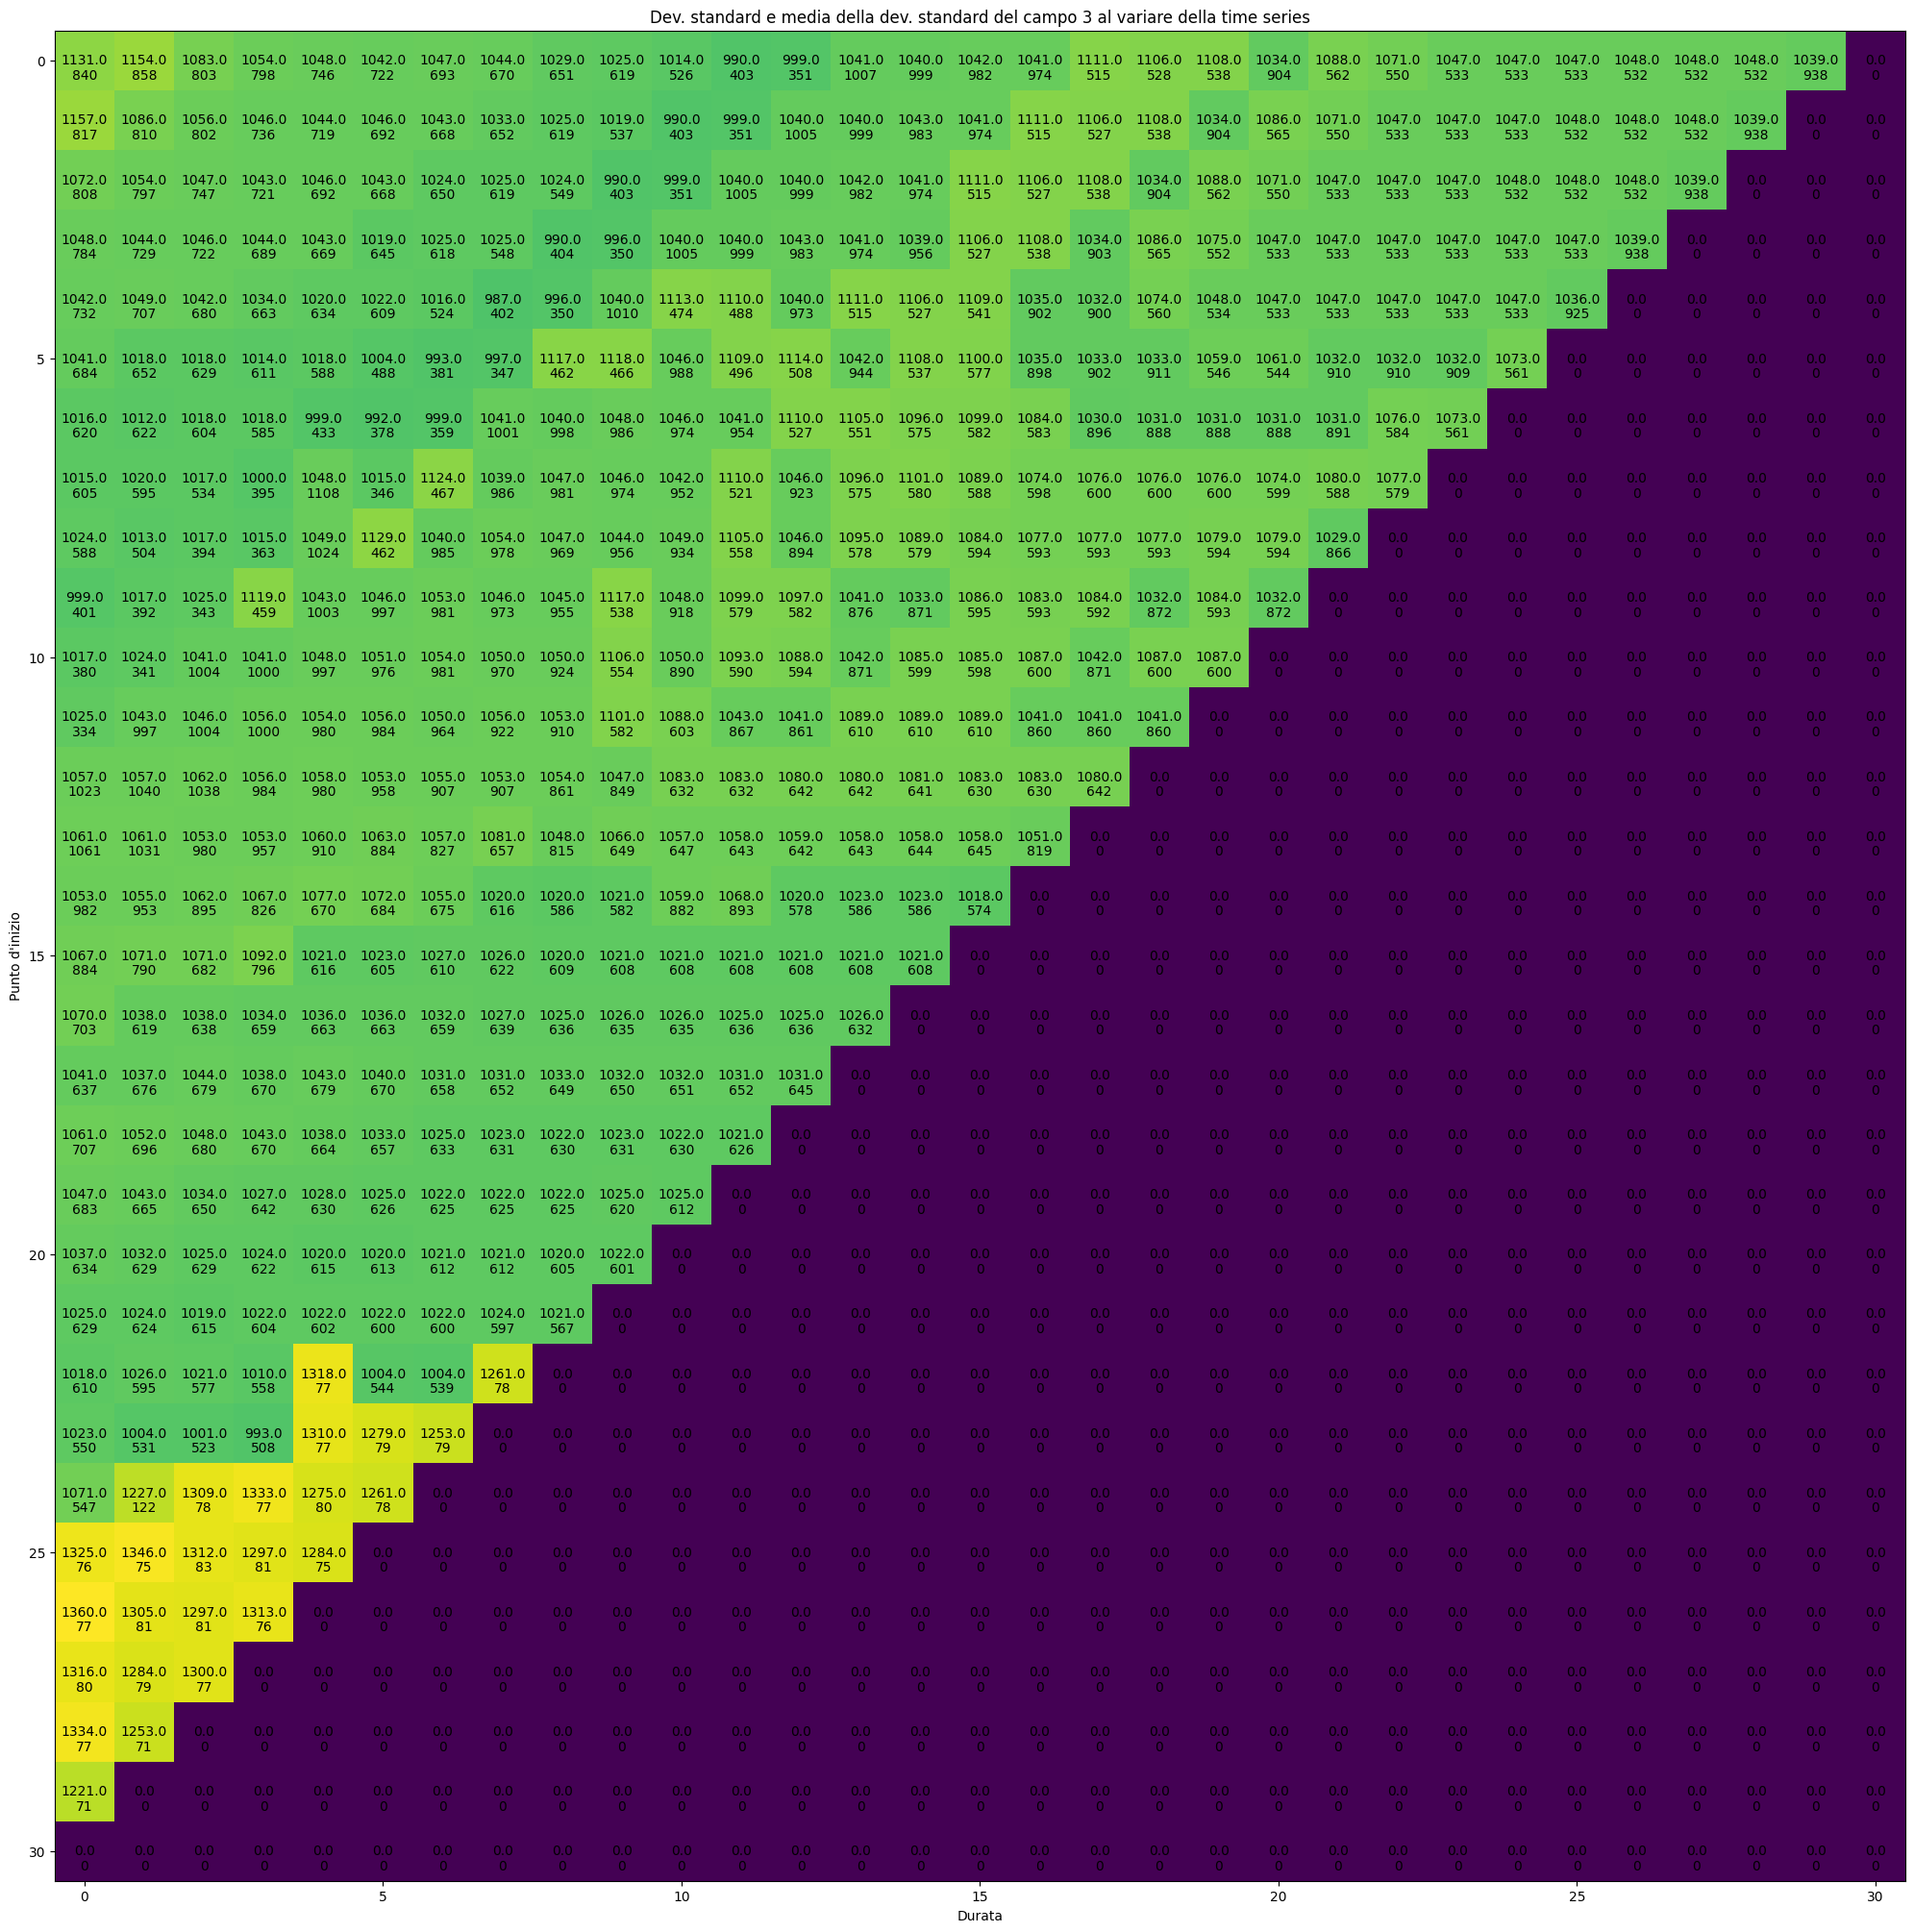

In [33]:
# Andiamo a stampare le deviazioni standard di tutti i cluster per il campo 3

for p in range(0,num_cluster):
    
    fig, ax = plt.subplots()

    image = ax.imshow(cluster_deviation3[:,:,p])


    plt.xlabel("Durata")
    plt.ylabel("Punto d'inizio")
    plt.title("Dev. standard e media della dev. standard del campo 3 al variare della time series")

    fig.set_size_inches(25,25)
    for i in range(0,cluster_deviation3.shape[0]):
        for j in range(0,cluster_deviation3.shape[1]):
            c = np.round(cluster_deviation3[i,j,p],decimals=0)
            ax.text(j, i, str(c), va='center', ha='center')
            ax.text(j,(i+0.25),str(number_elements_3[i,j,p]),va='center', ha='center')

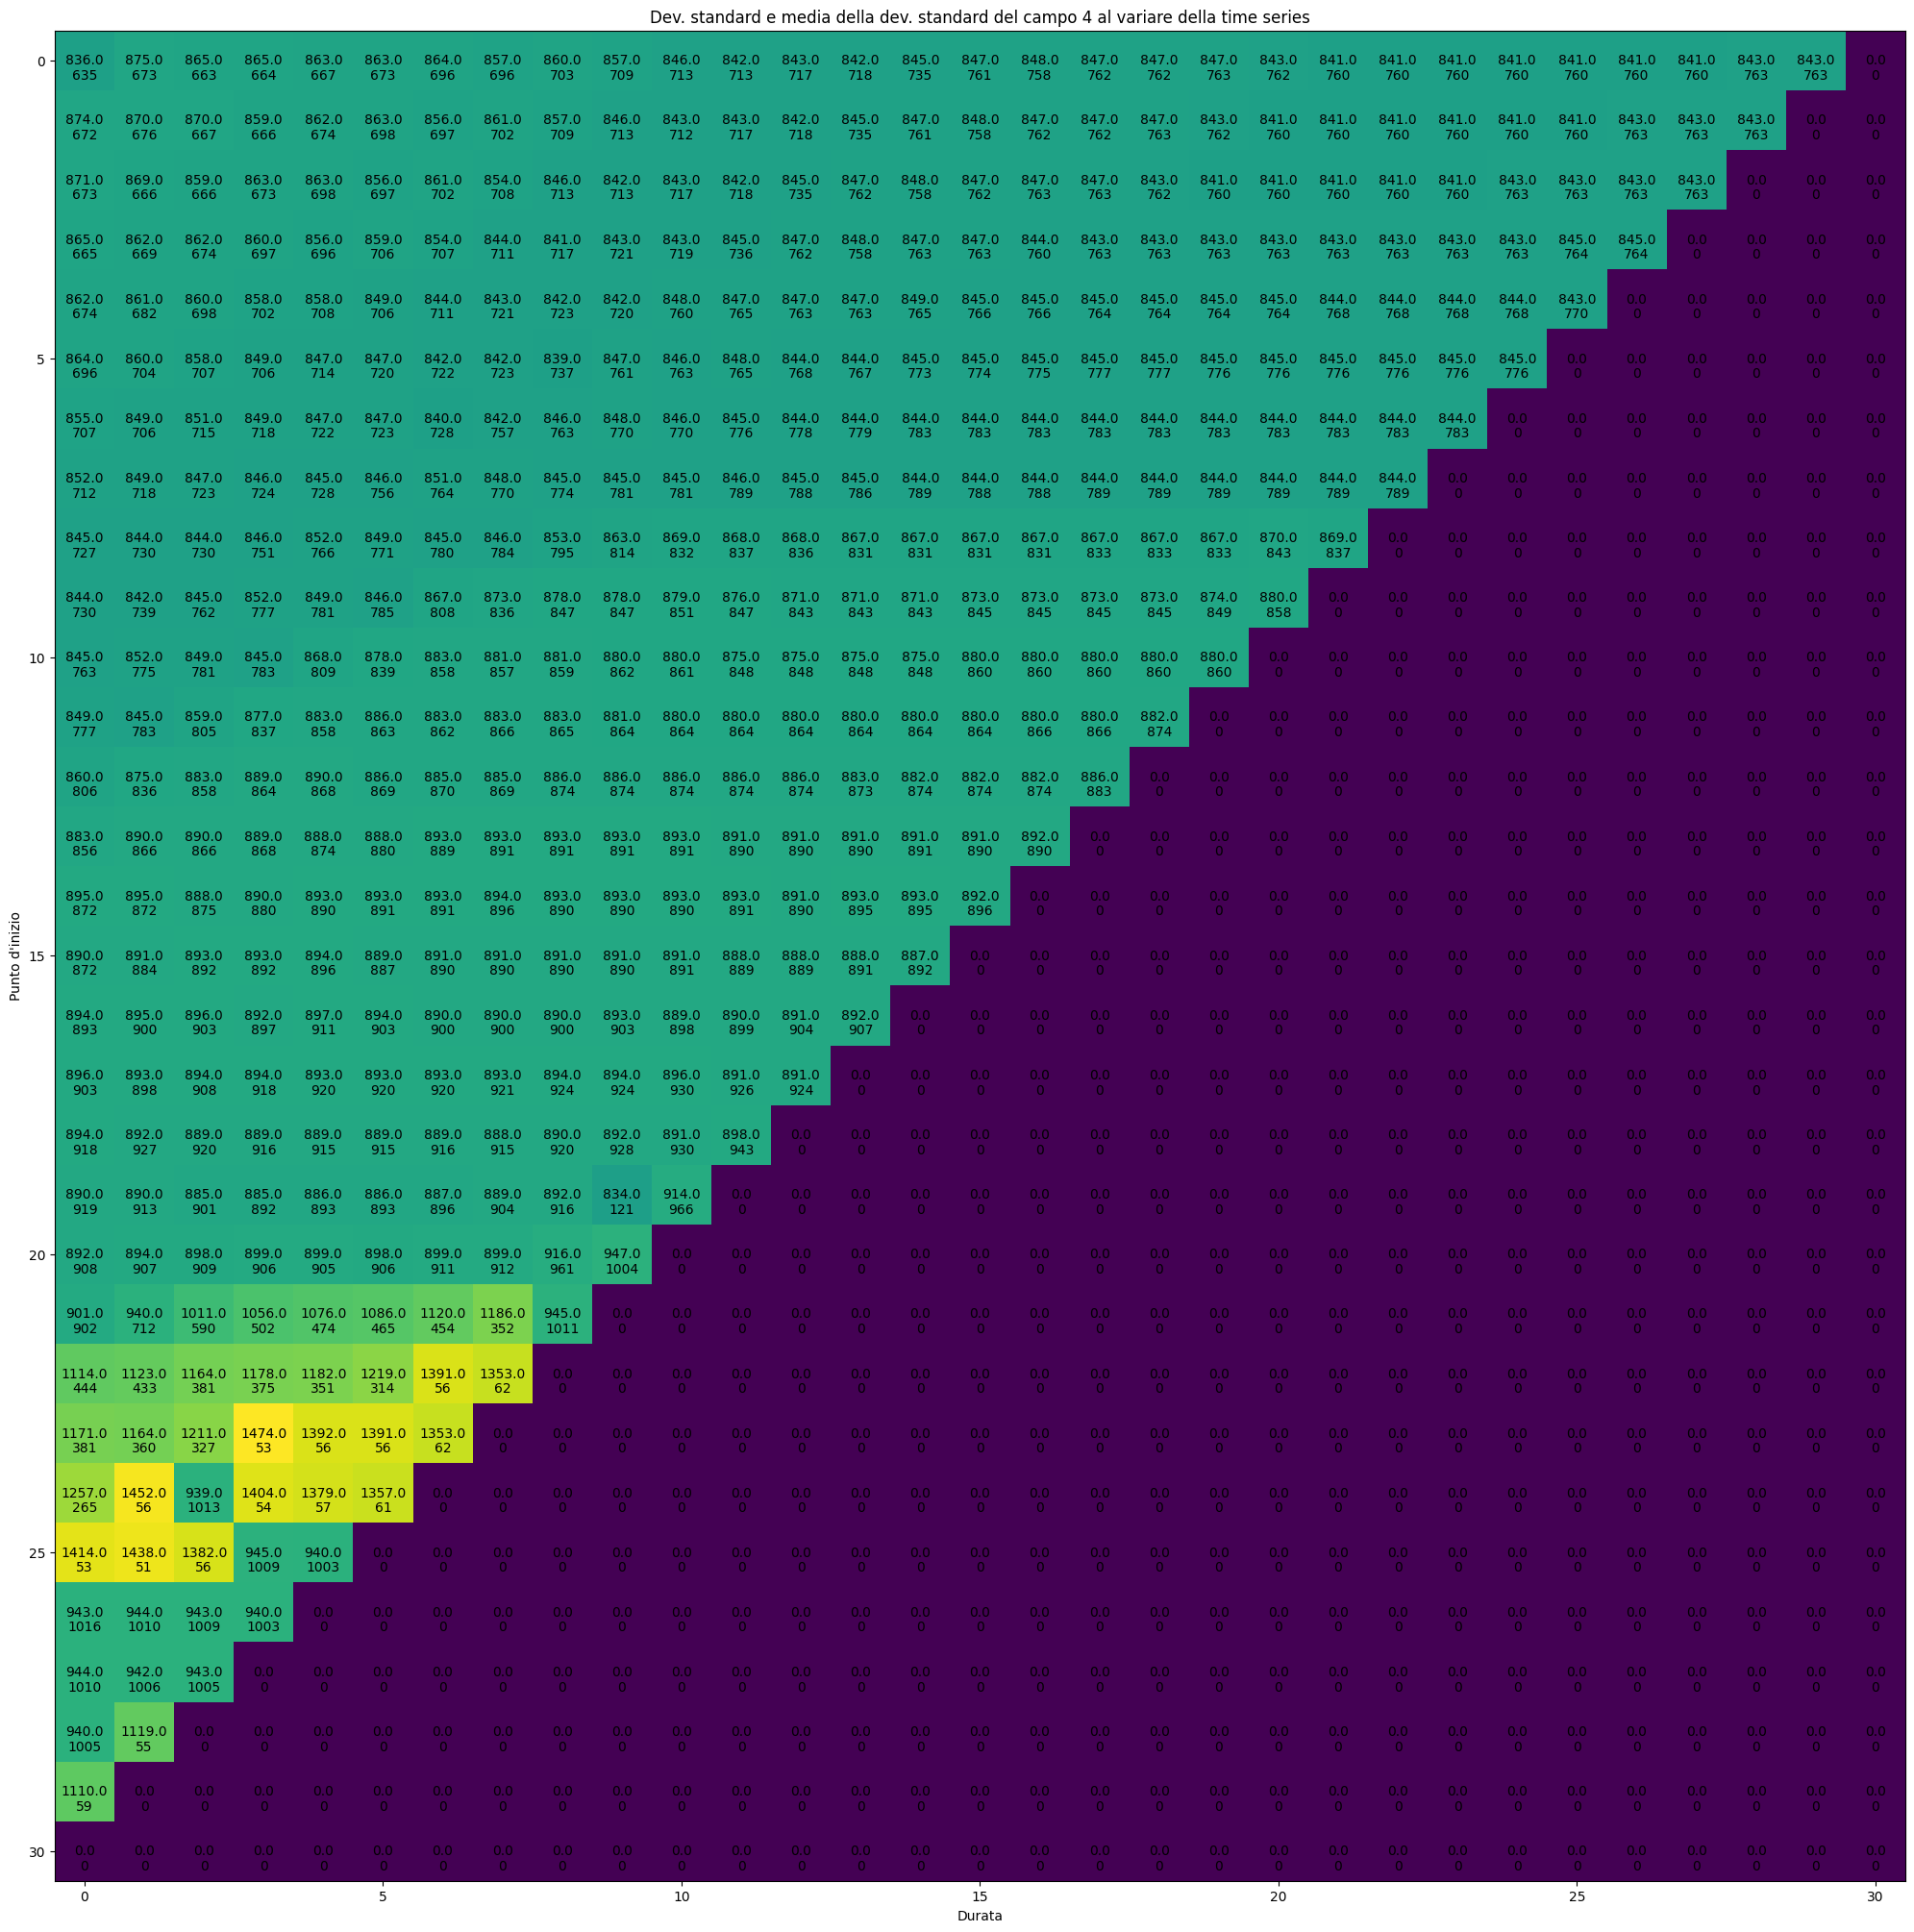

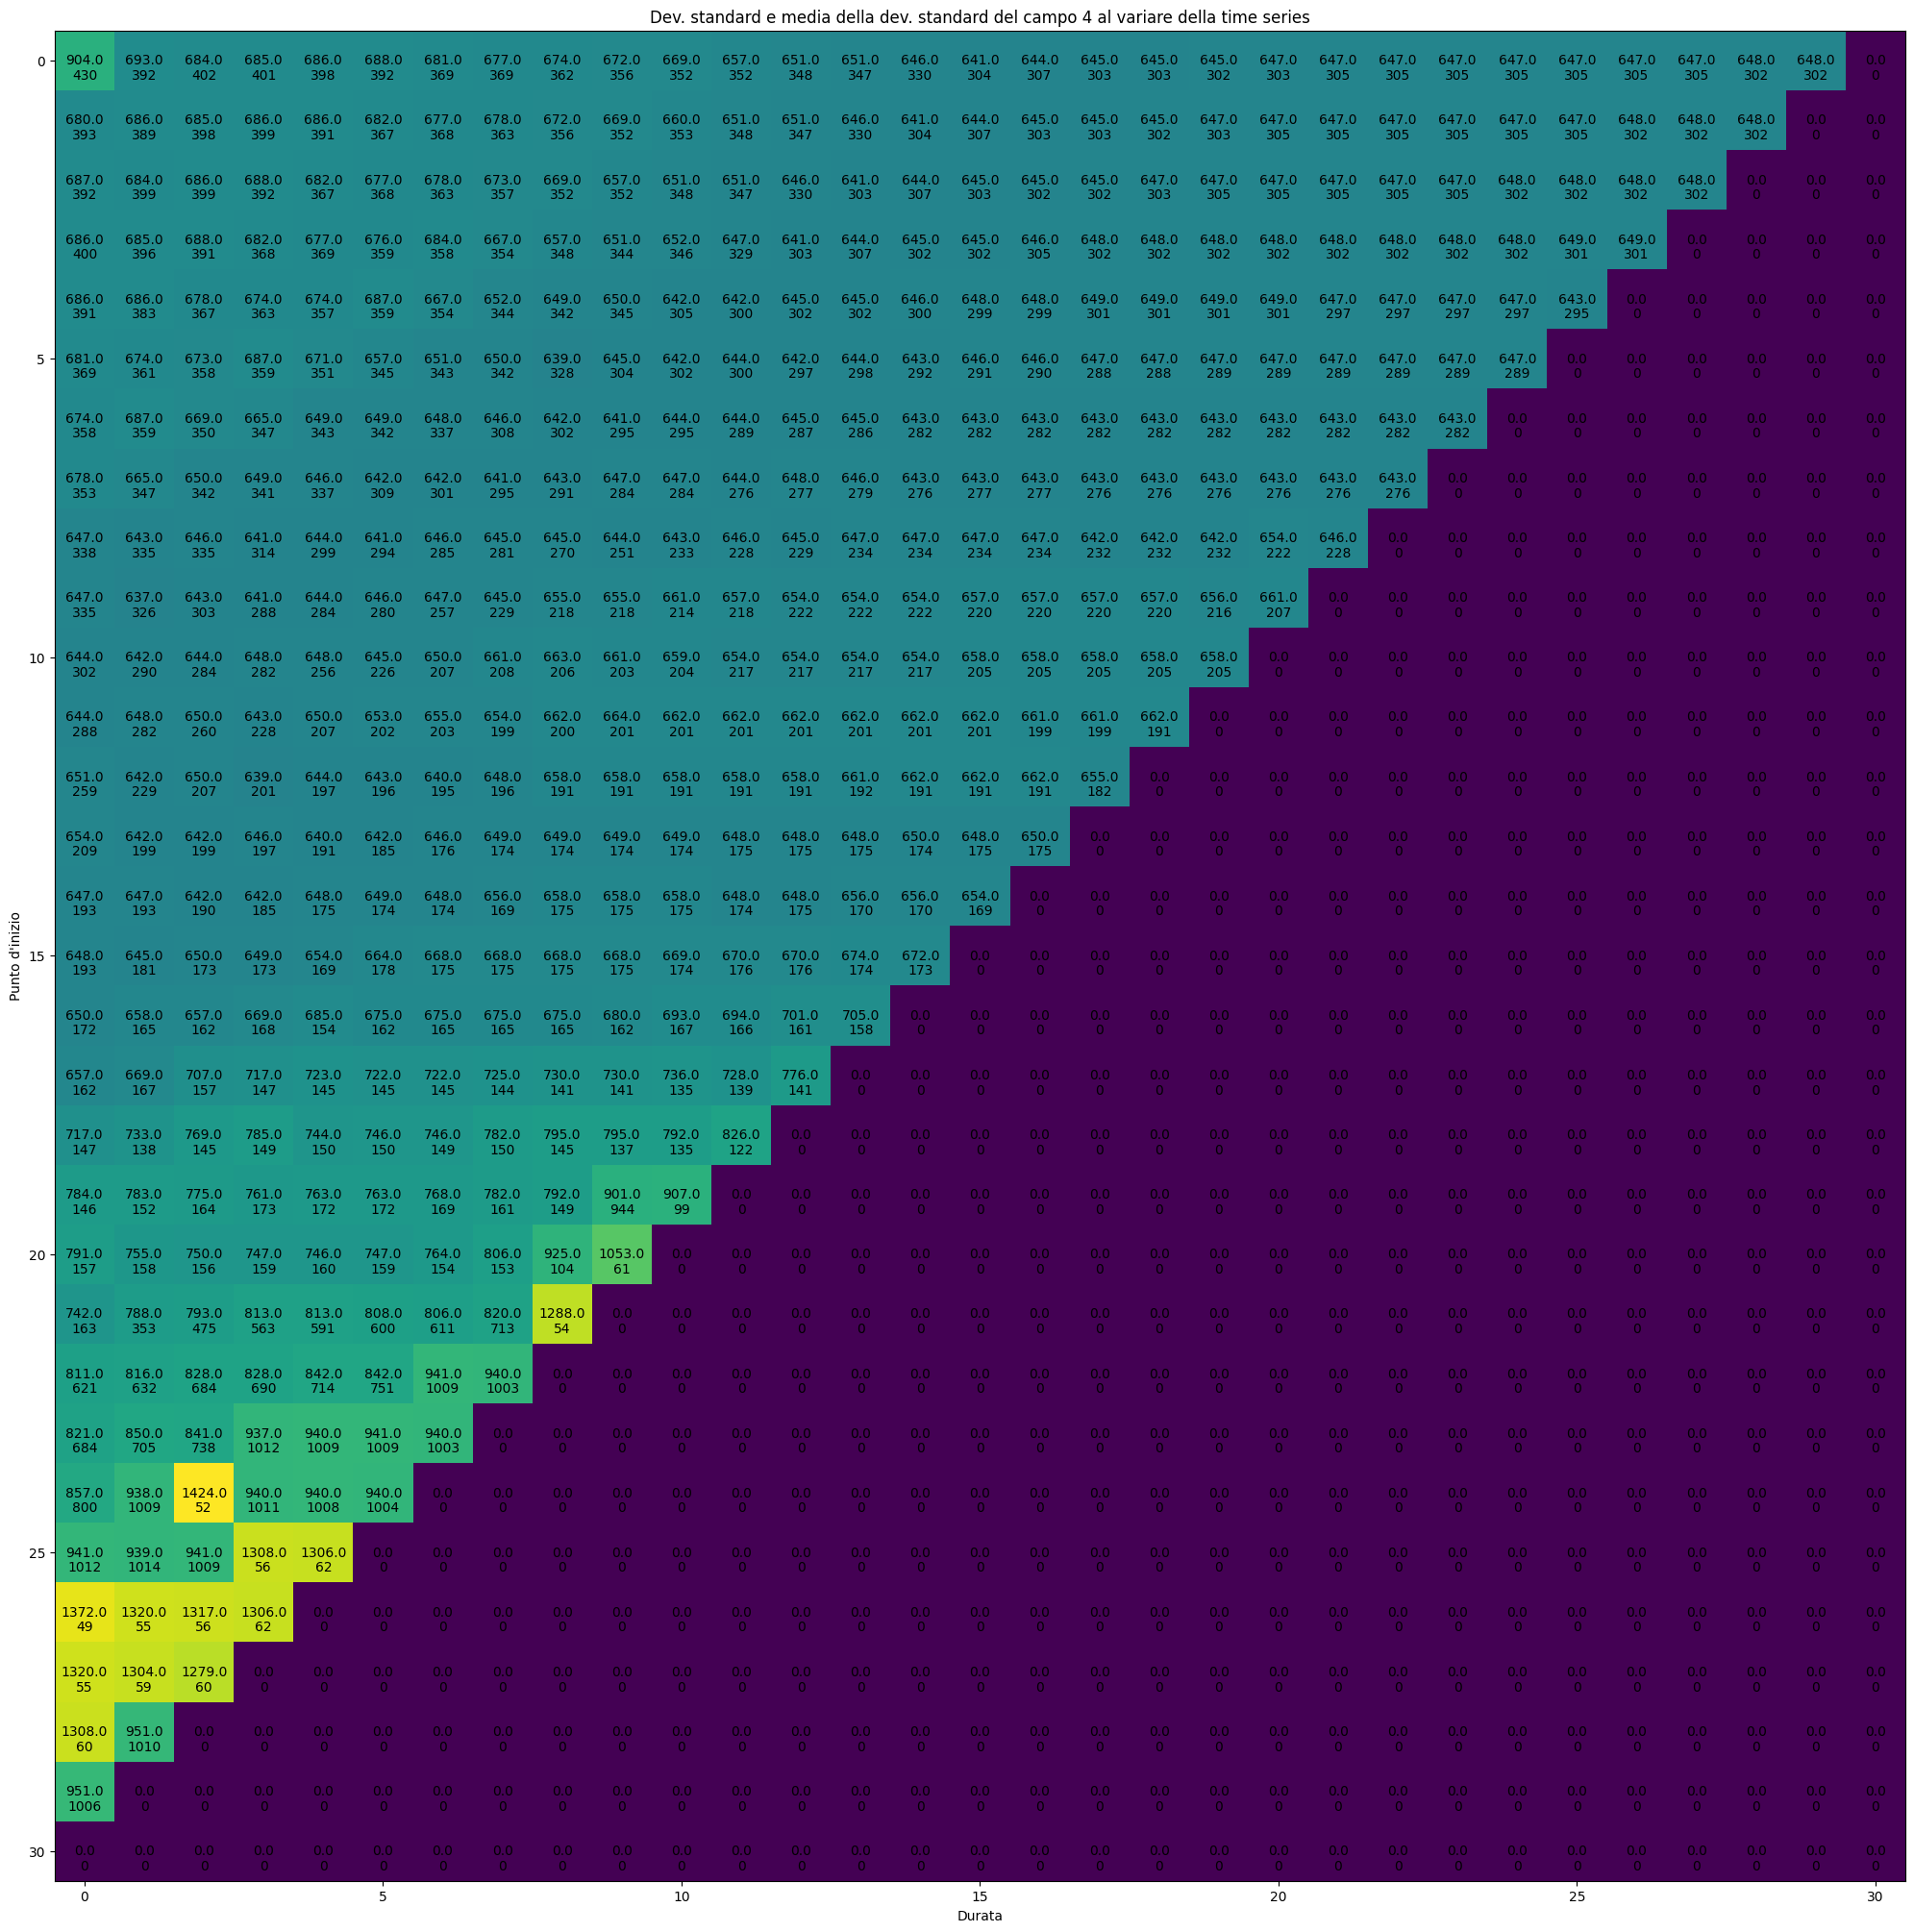

In [34]:
# Andiamo a stampare le deviazioni standard di tutti i cluster per il campo 4

for p in range(0,num_cluster):
    
    fig, ax = plt.subplots()

    image = ax.imshow(cluster_deviation4[:,:,p])


    plt.xlabel("Durata")
    plt.ylabel("Punto d'inizio")
    plt.title("Dev. standard e media della dev. standard del campo 4 al variare della time series")

    fig.set_size_inches(25,25)
    for i in range(0,cluster_deviation4.shape[0]):
        for j in range(0,cluster_deviation4.shape[1]):
            c = np.round(cluster_deviation4[i,j,p],decimals=0)
            ax.text(j, i, str(c), va='center', ha='center')
            ax.text(j,(i+0.25),str(number_elements_4[i,j,p]),va='center', ha='center')

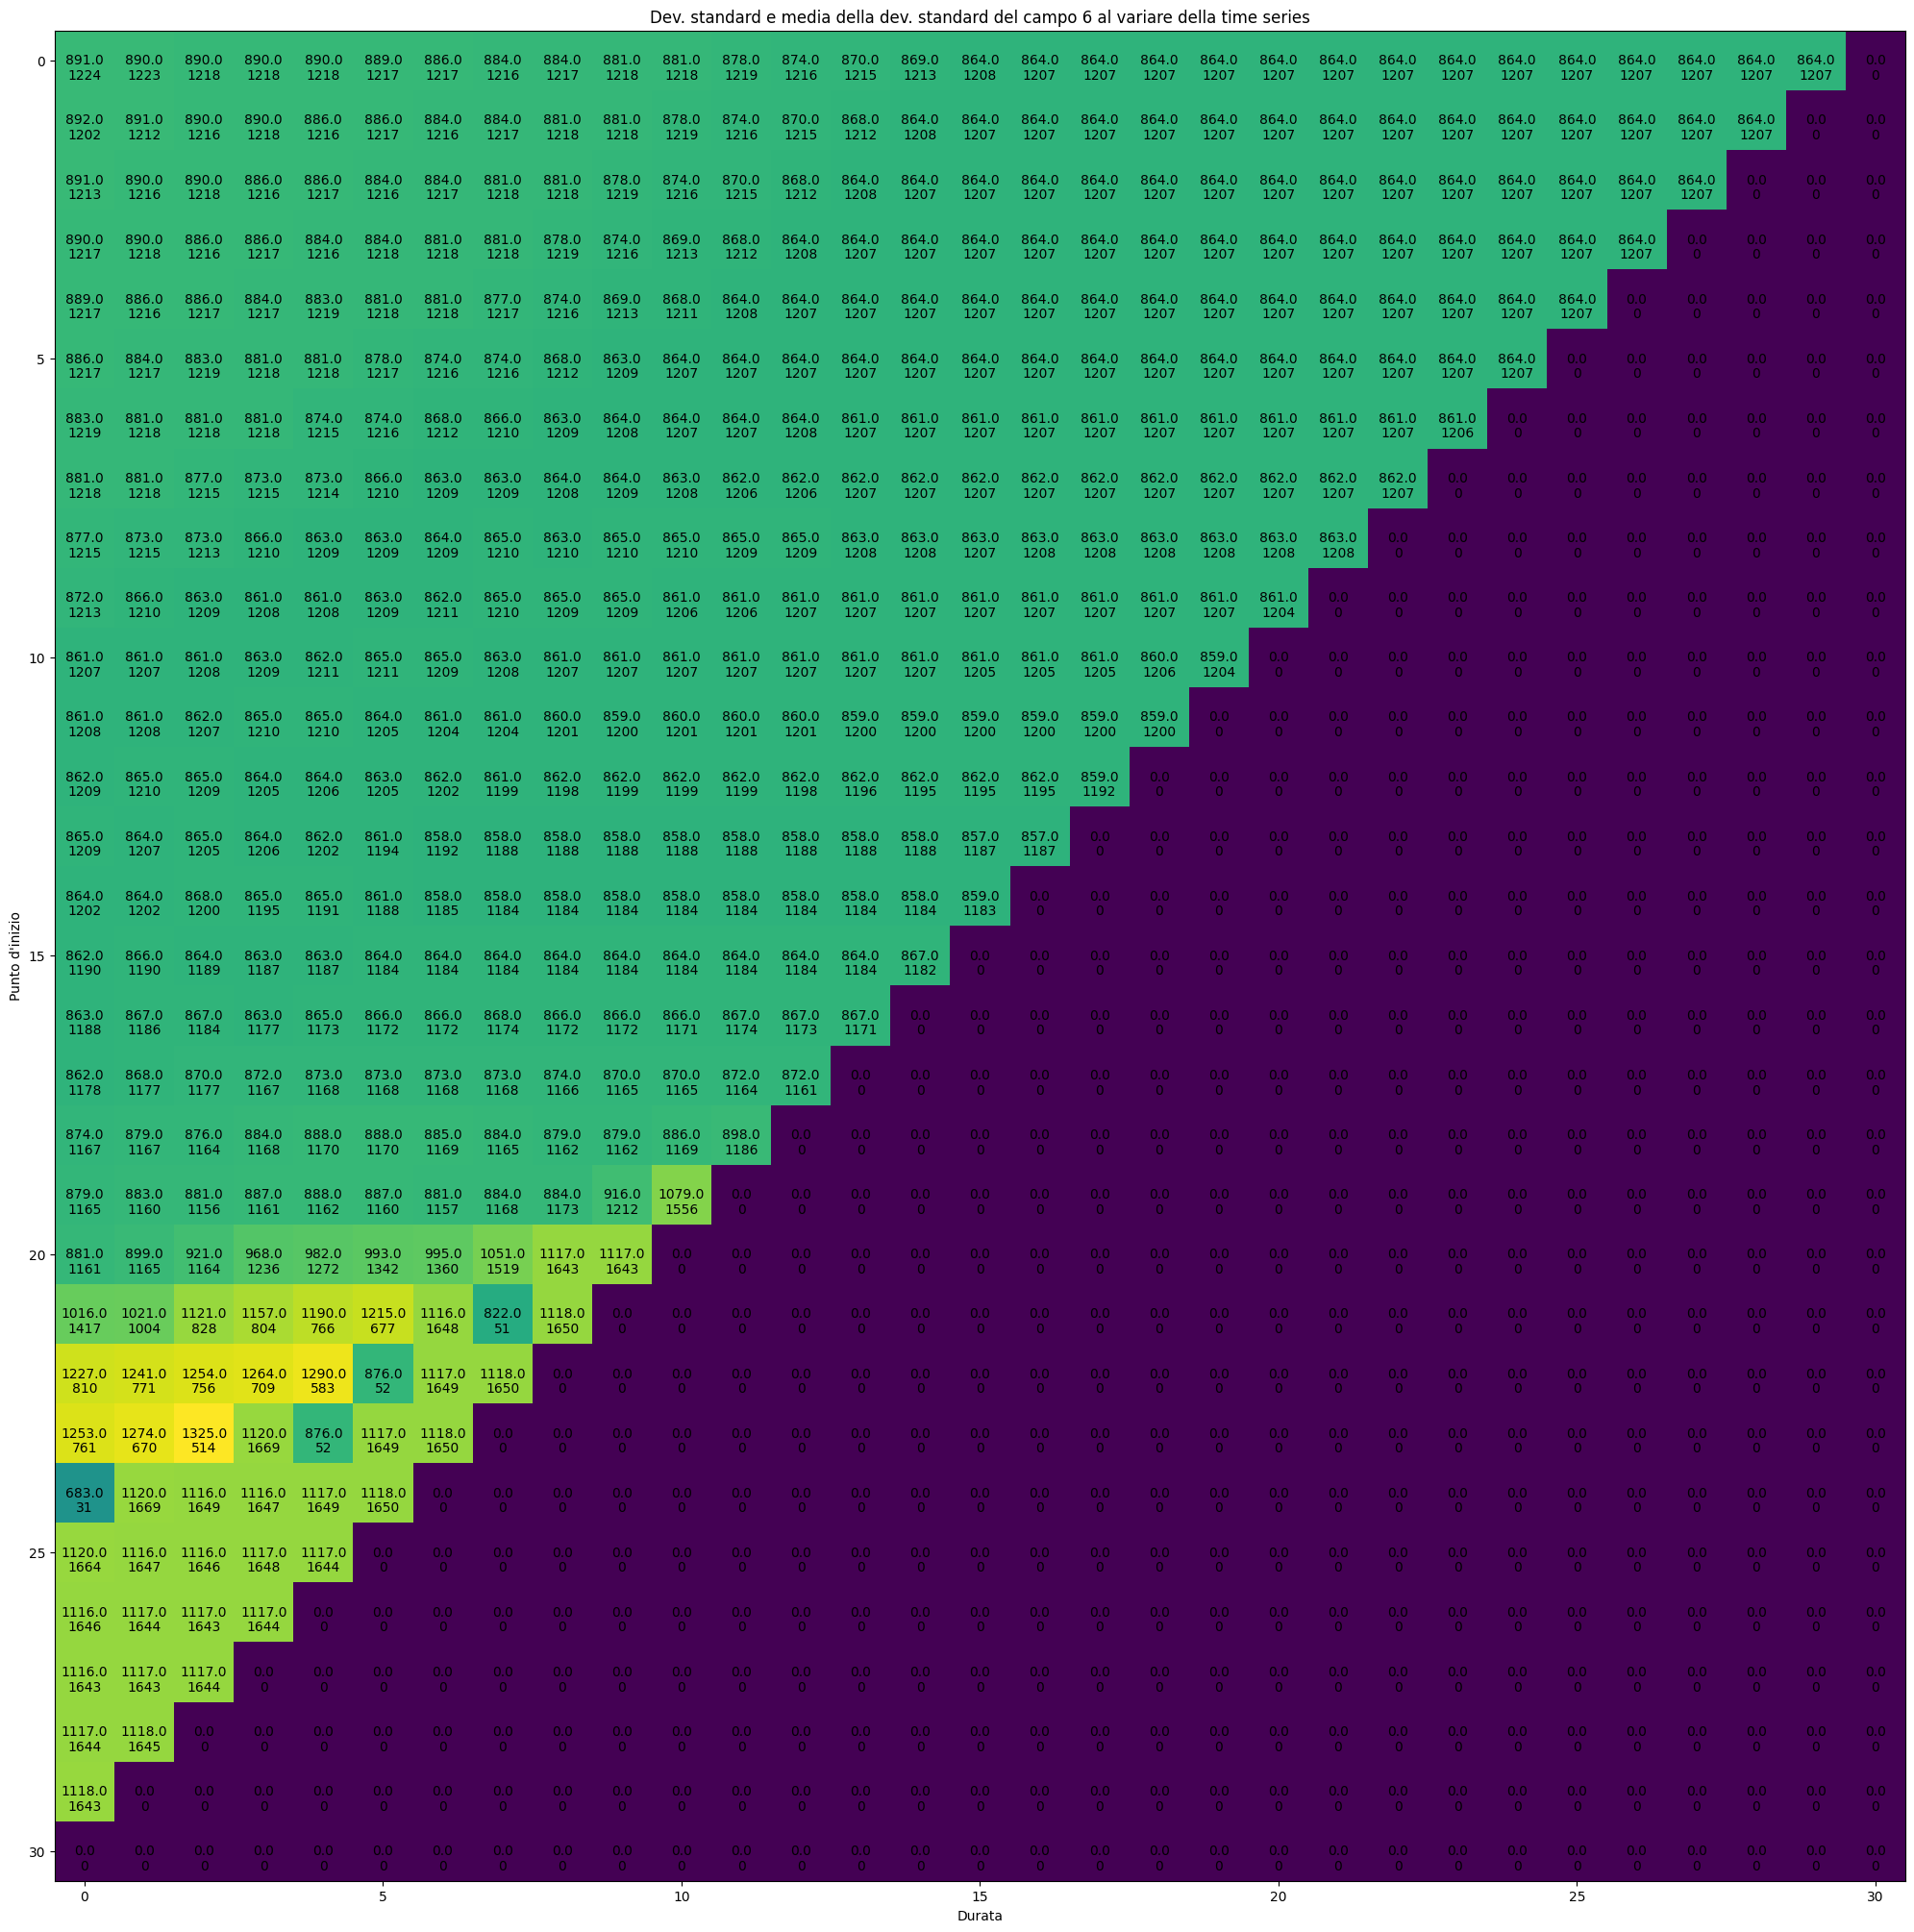

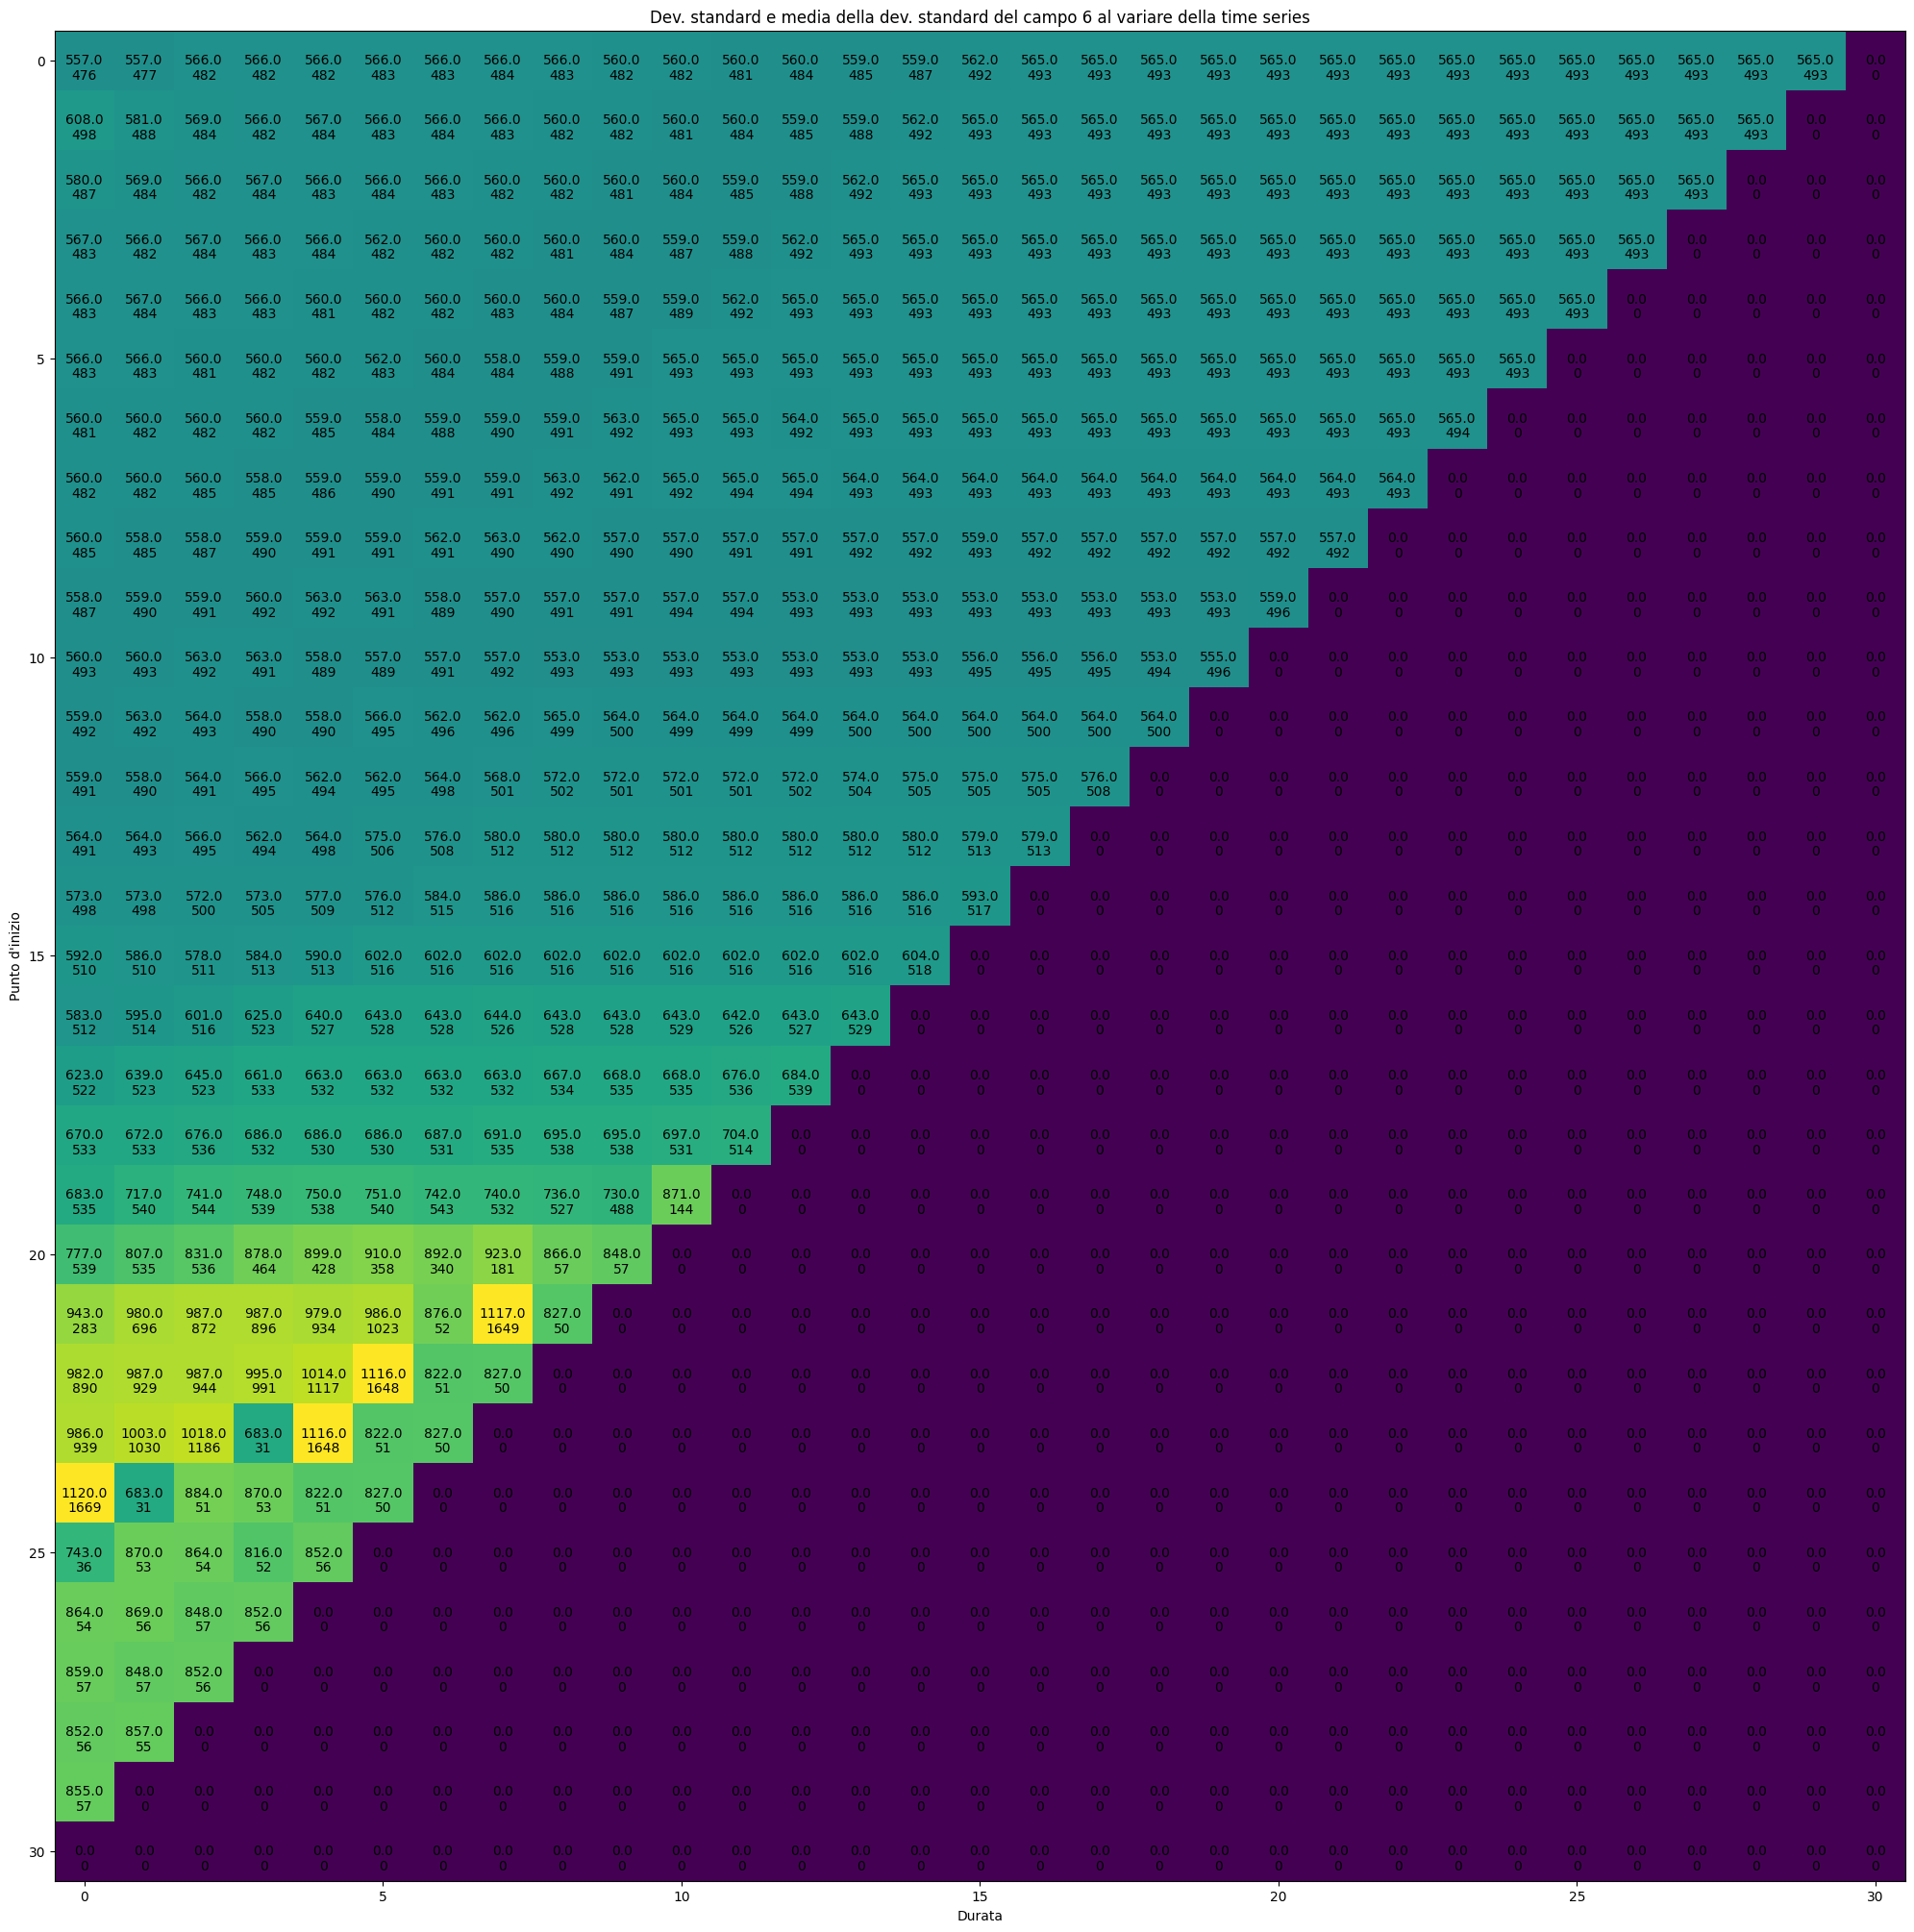

In [35]:
# Andiamo a stampare le deviazioni standard di tutti i cluster per il campo 6

for p in range(0,num_cluster):
    
    fig, ax = plt.subplots()

    image = ax.imshow(cluster_deviation6[:,:,p])


    plt.xlabel("Durata")
    plt.ylabel("Punto d'inizio")
    plt.title("Dev. standard e media della dev. standard del campo 6 al variare della time series")

    fig.set_size_inches(25,25)
    for i in range(0,cluster_deviation6.shape[0]):
        for j in range(0,cluster_deviation6.shape[1]):
            c = np.round(cluster_deviation6[i,j,p],decimals=0)
            ax.text(j, i, str(c), va='center', ha='center')
            ax.text(j,(i+0.25),str(number_elements_6[i,j,p]),va='center', ha='center')

# Analisi della separazione con somma delle distanze tra un i punti di un cluster e tutti gli altri

In [36]:
# Altra metrica di separazione 

sum_separation = np.zeros([x,y,num_cluster])
    
for i in range(x):
    for j in range(y):
        if rese_total[i,j,0] is not None:
            for a,resaj in zip(rese_total[i,j,:],range(num_cluster)):
                sum = 0
                for b,resai in zip(rese_total[i,j,:],range(num_cluster)):
                    if(resai == resaj):
                        continue
                    for c in a:
                        for d in b:
                            sum += abs(c-d)
                sum_separation[i,j,resaj] = ((sum/(len(newResa3)-len(a))))/len(a)

        

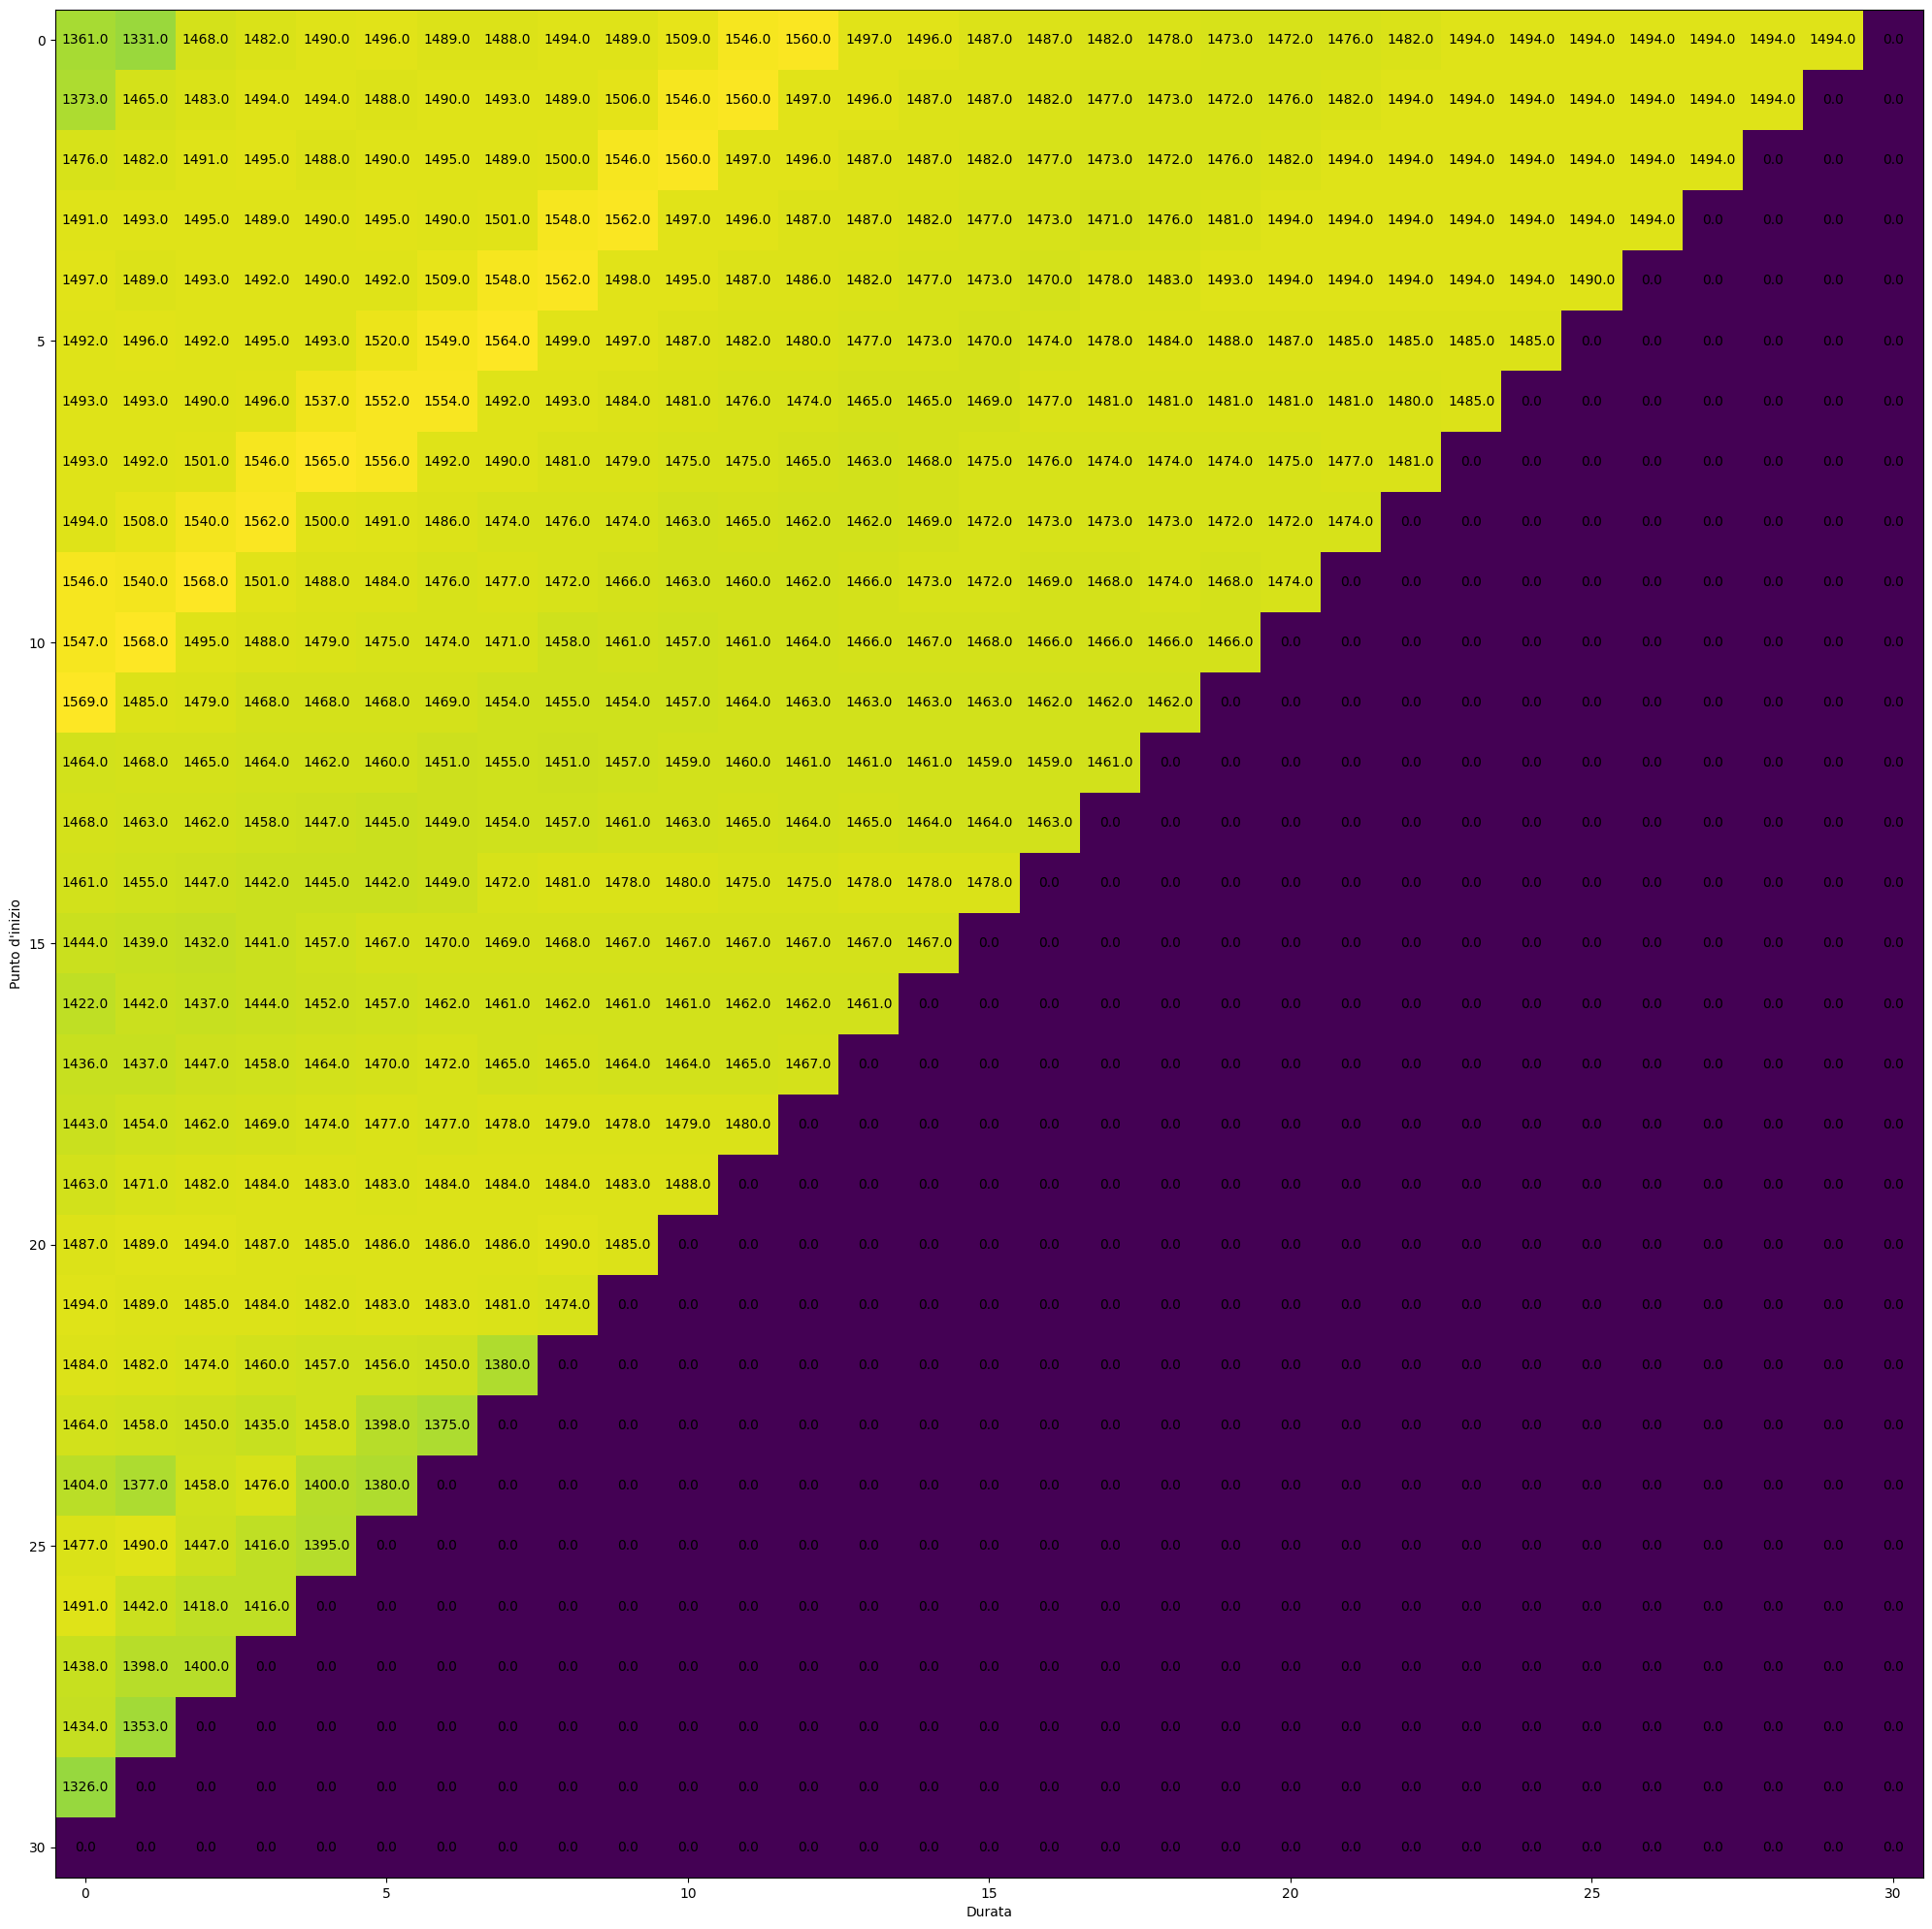

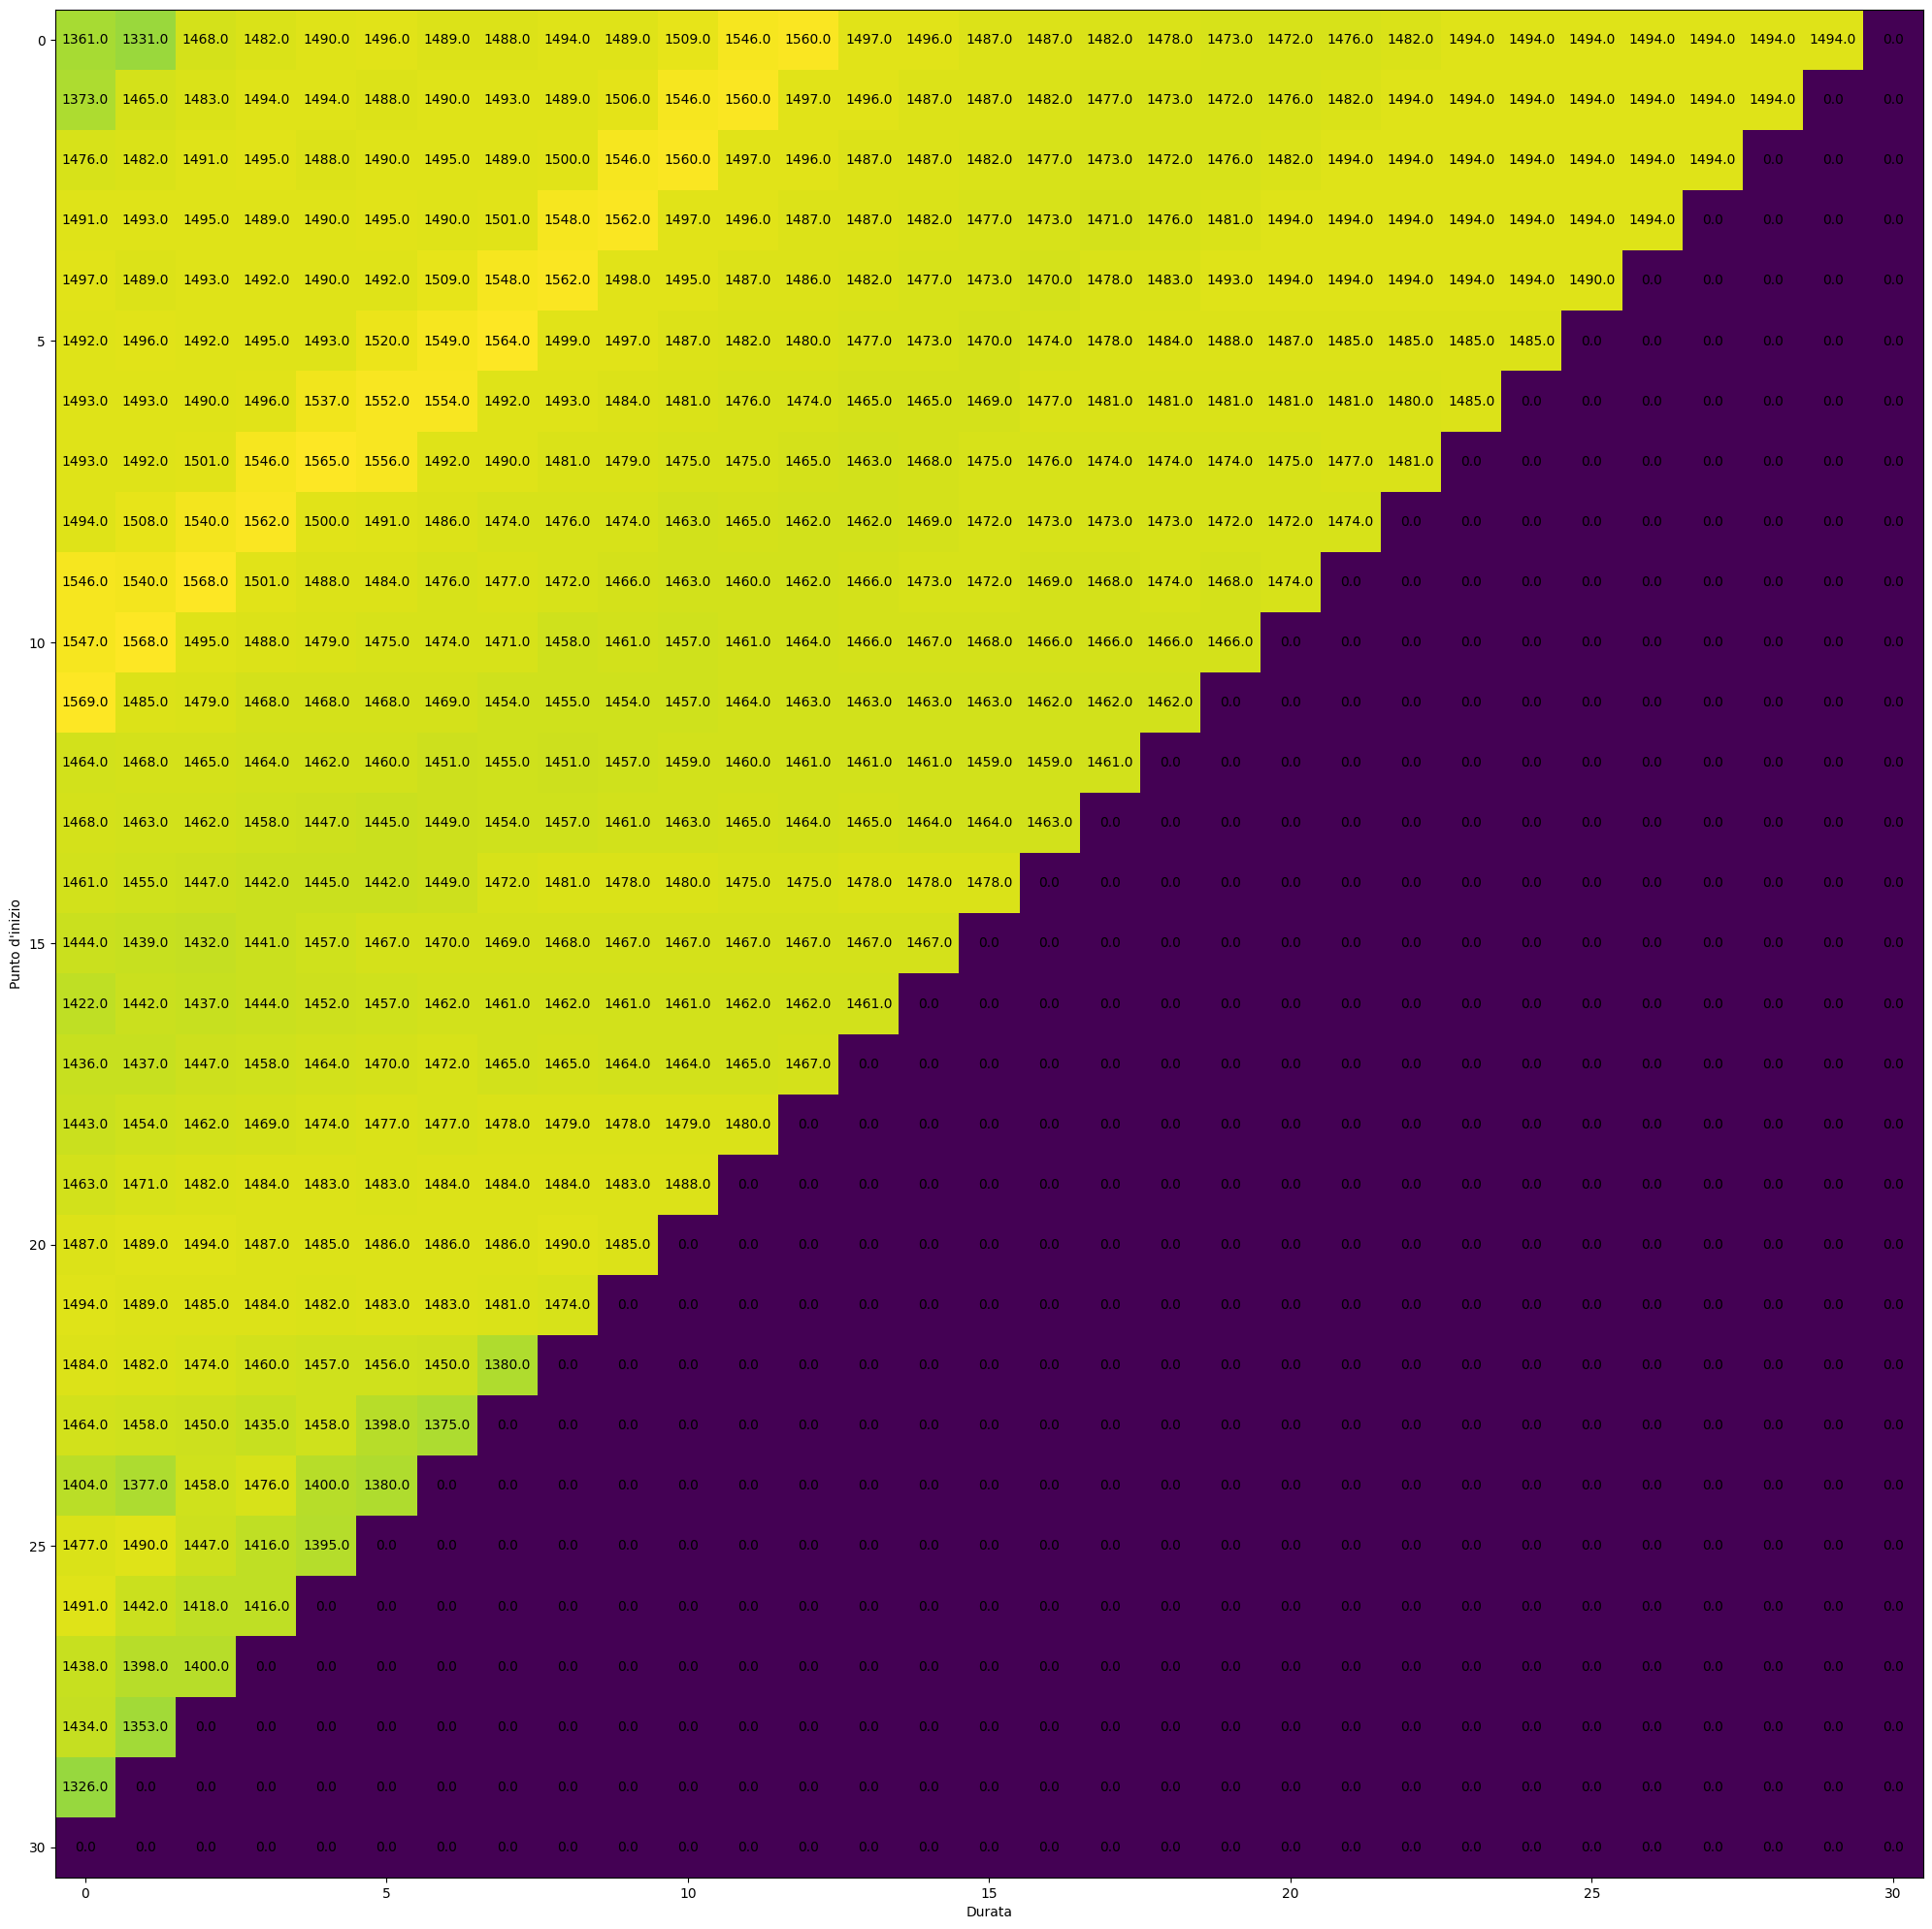

In [37]:

for p in range(num_cluster):
    fig, ax = plt.subplots()
    image = ax.imshow(sum_separation[:,:,p])

    plt.xlabel("Durata")
    plt.ylabel("Punto d'inizio")

    fig.set_size_inches(25,25)
    for i in range(x):
        for j in range(y):
            c = np.round(sum_separation[i,j,p],decimals=0)
            ax.text(j, i, str(c), va='center', ha='center')

# Calcolo della media per ogni cluster

In [38]:

cluster_mean = np.zeros([x,y,num_cluster])


for i in range(x):
    for j in range(y):
        if rese_total[i,j,0] is not None:
            for k in range(num_cluster):
                cluster_mean[i,j,k] = rese_total[i,j,k].mean()


In [39]:
from itertools import combinations
perm = list(combinations(range(num_cluster), 2))
print(list(perm))
print(perm[0][1])

[(0, 1)]
1


# Calcolo della separazione usando la media della distanza dei centroidi

In [40]:
import math
from itertools import combinations
perm = list(combinations(range(num_cluster), 2))

separation = np.zeros([x,y,math.comb(num_cluster, 2)])

for i in range(x):
    for j in range(y):
        if rese_total[i,j,0] is not None:
            for cluster_couple,index in zip(perm,range(math.comb(num_cluster, 2))):        
                separation[i,j,index]= abs(cluster_mean[i,j,cluster_couple[0]]-cluster_mean[i,j,cluster_couple[1]])

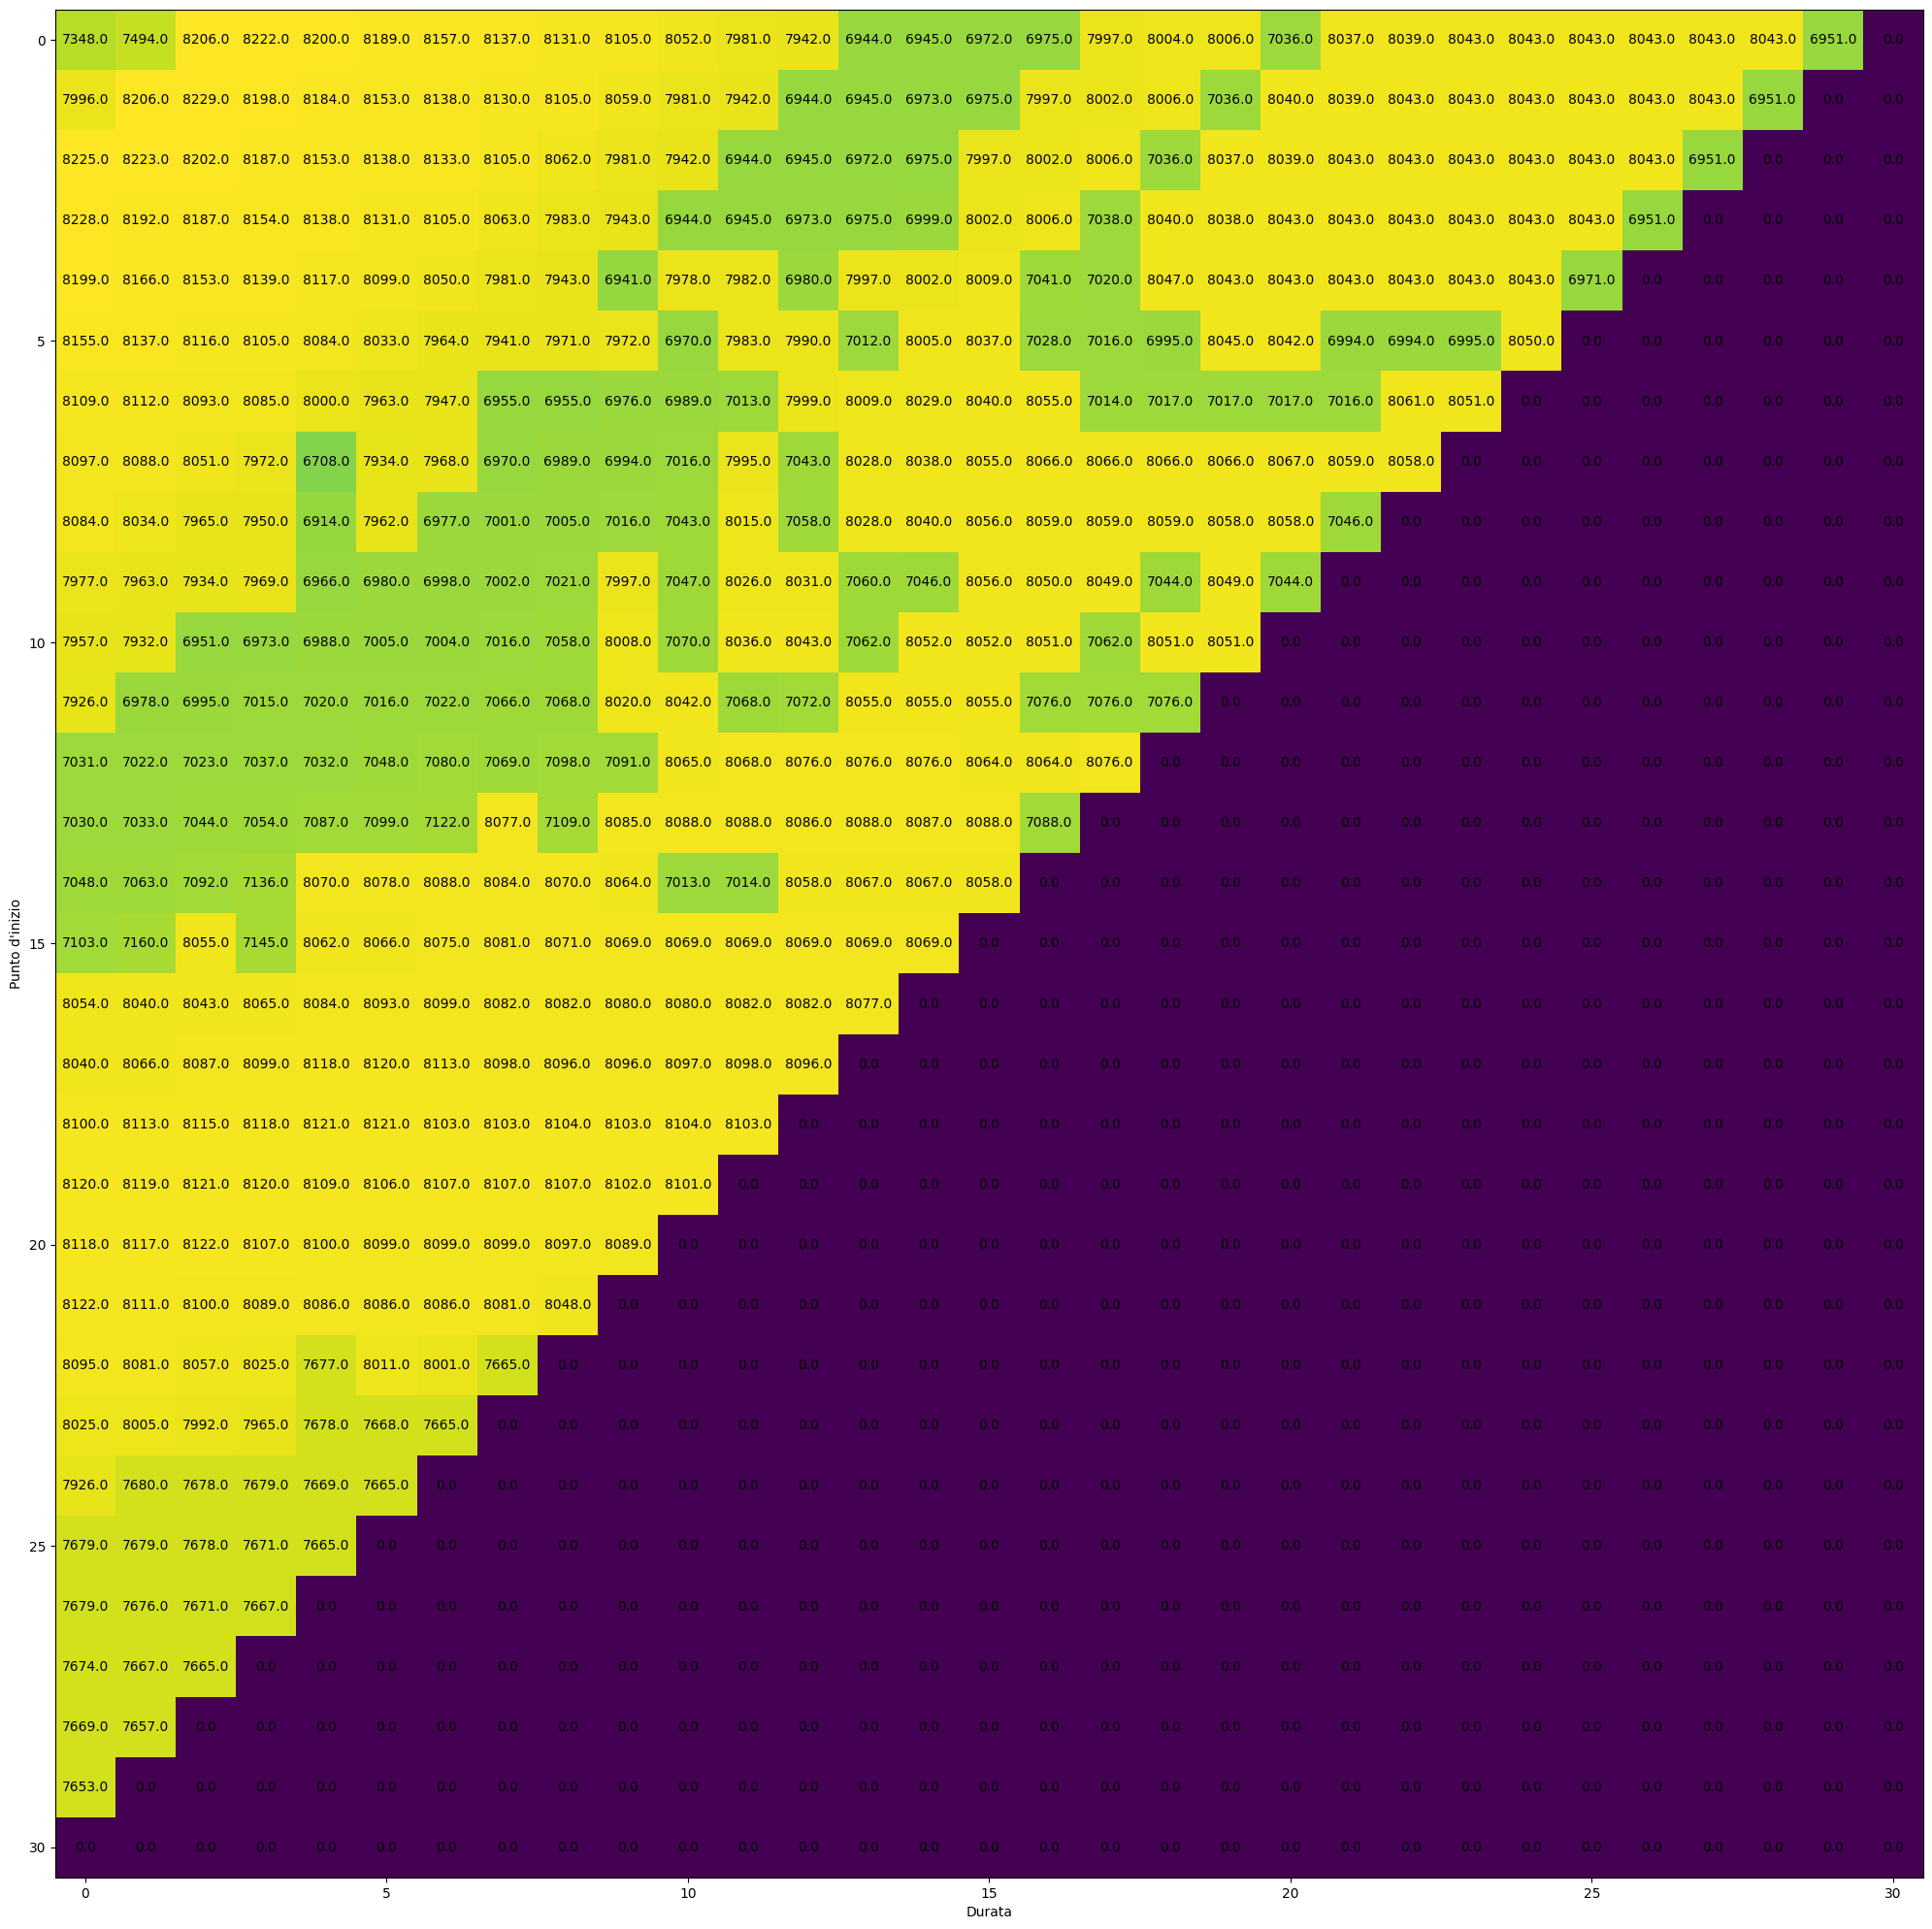

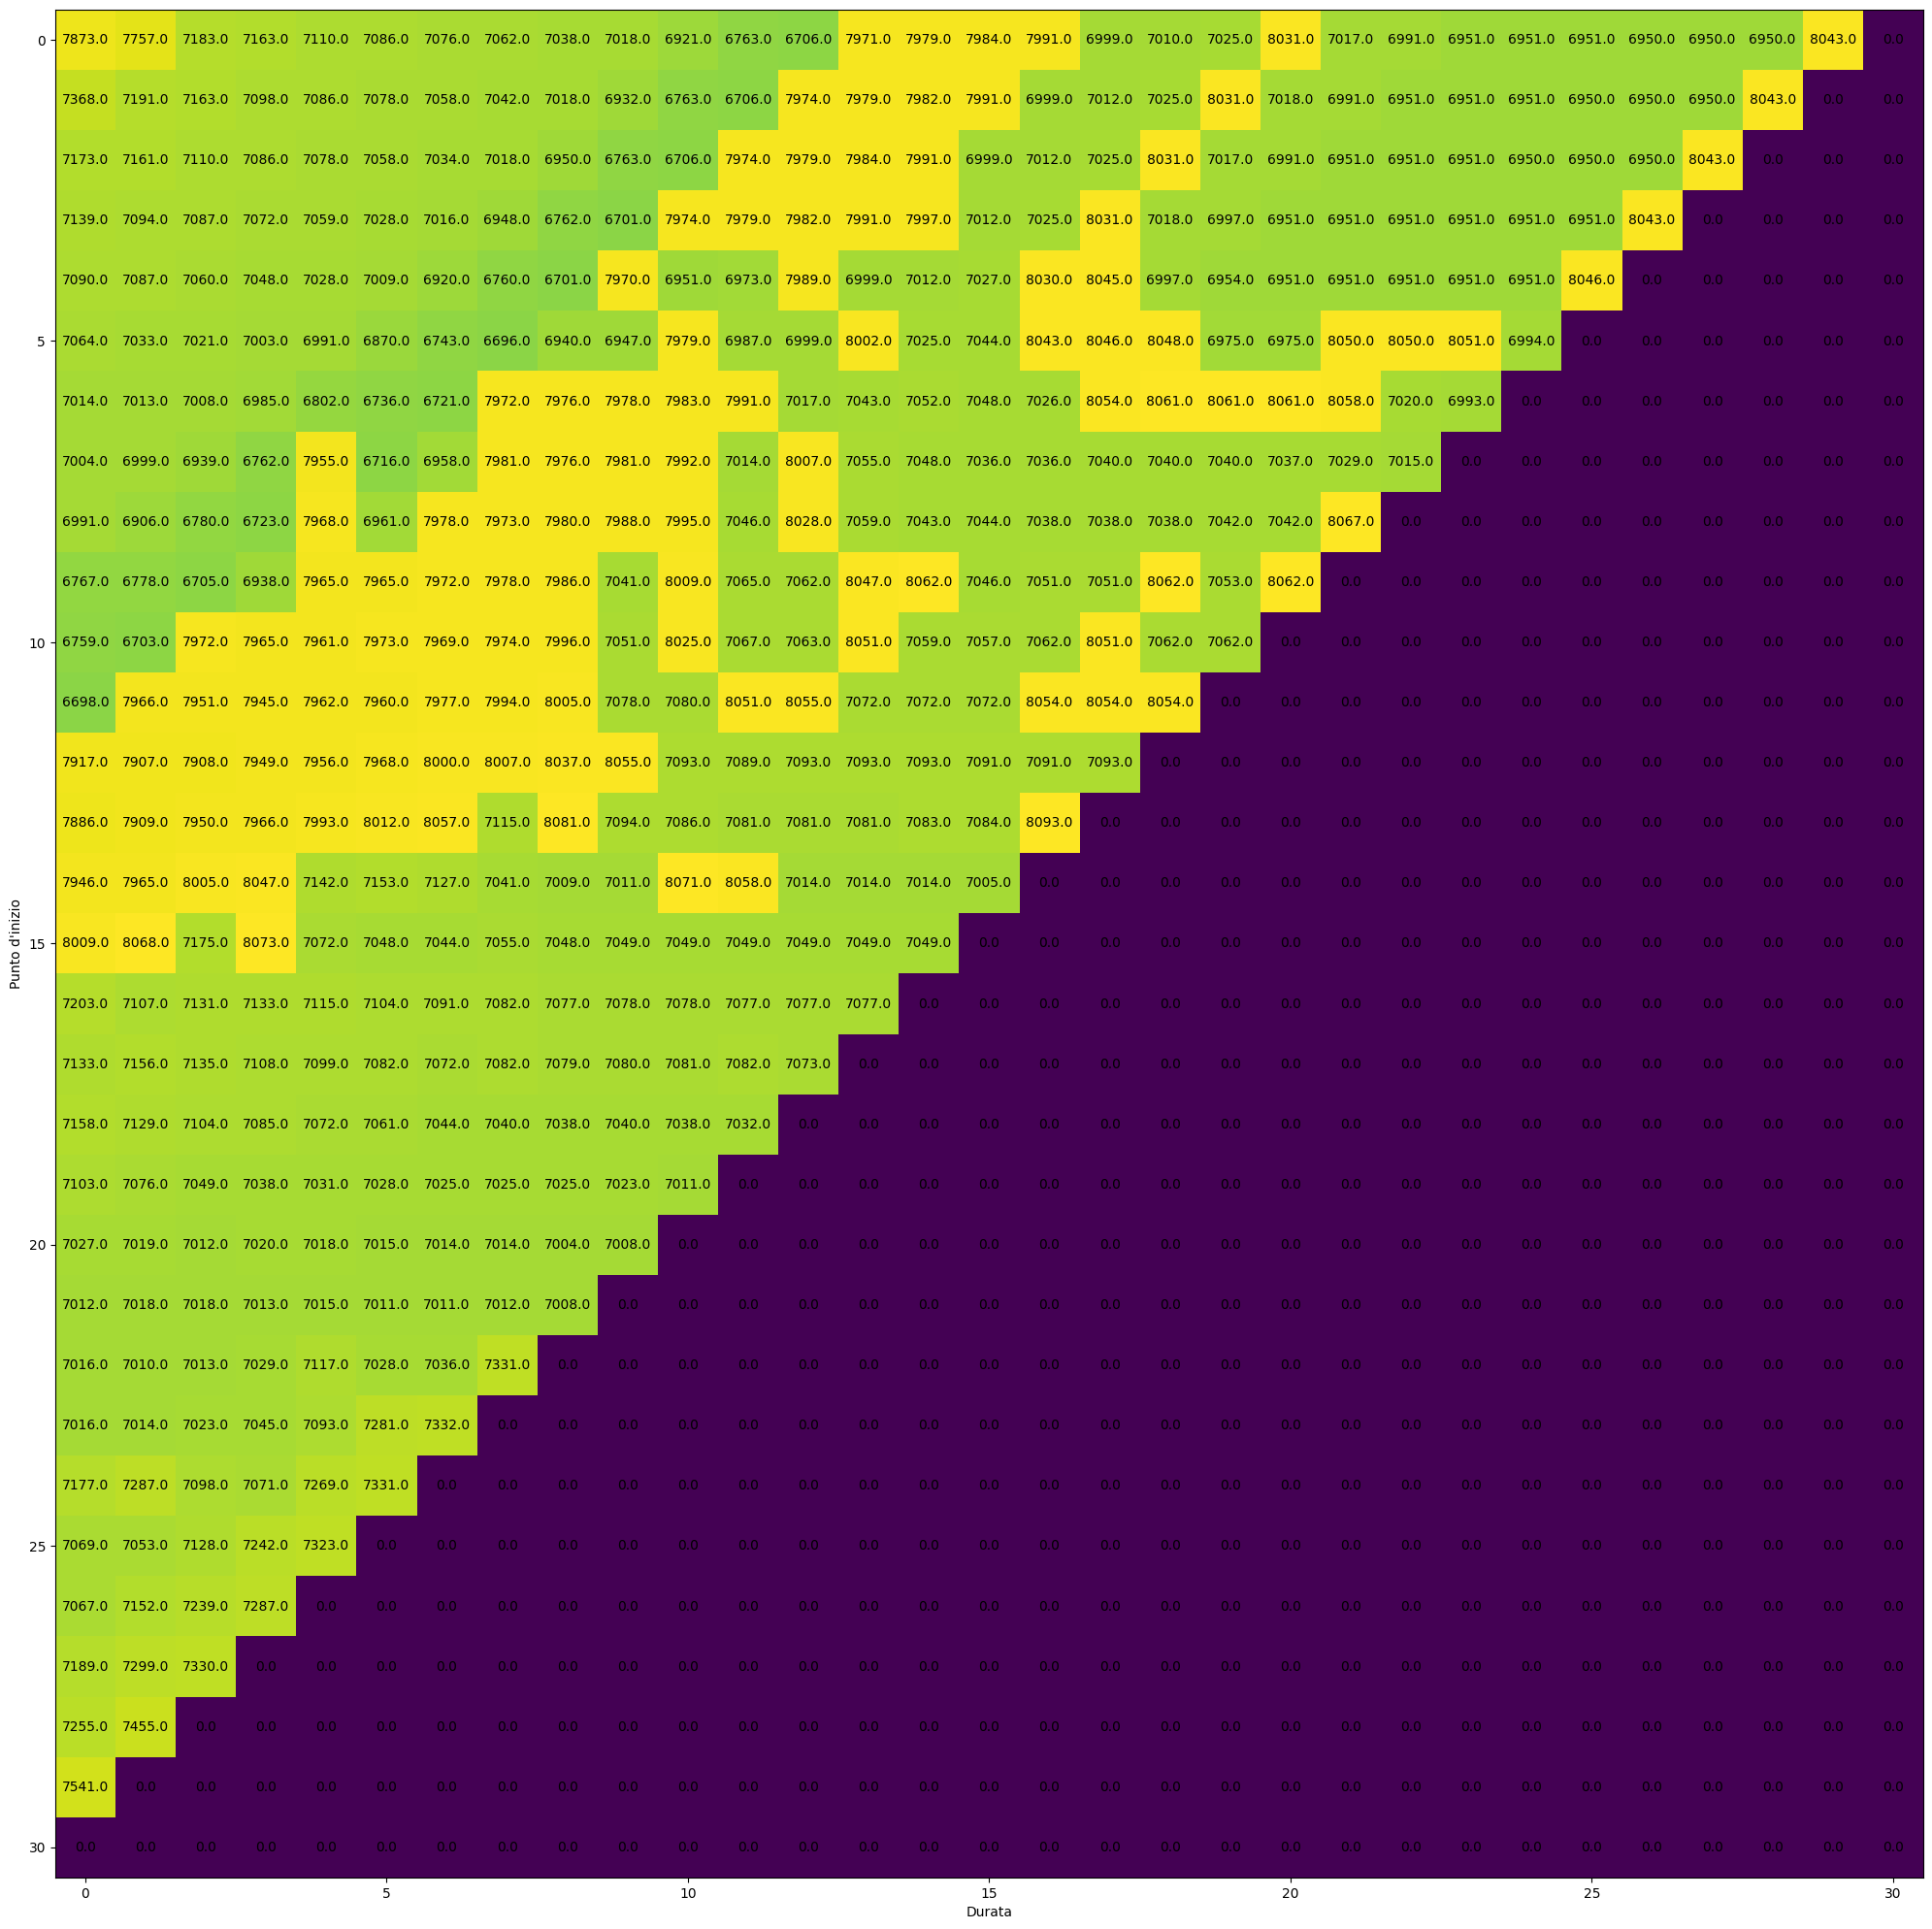

In [41]:
# Andiamo a stampare le medie per ogni cluster
for p in range(0,num_cluster):
    fig, ax = plt.subplots()

    image = ax.imshow(cluster_mean[:,:,p])


    plt.xlabel("Durata")
    plt.ylabel("Punto d'inizio")

    fig.set_size_inches(25,25)
    for i in range(0,cluster_mean.shape[0]):
        for j in range(0,cluster_mean.shape[1]):
            c = np.round(cluster_mean[i,j,p],decimals=0)
            ax.text(j, i, str(c), va='center', ha='center')

# Rappresentazione della deviazione standard e della media in uno scatter plot

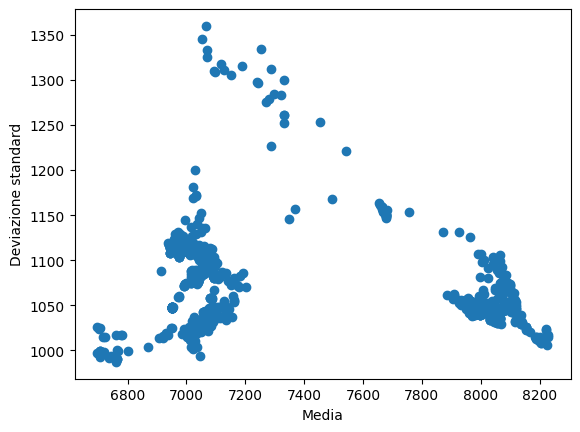

In [42]:
x = cluster_deviation[cluster_deviation > 100].flatten()

y = cluster_mean[cluster_deviation > 100].flatten()

plt.ylabel("Deviazione standard")
plt.xlabel("Media")

plt.scatter(y, x)
plt.show()